<a href="https://colab.research.google.com/github/honglynn/nerdyside/blob/master/marketing_banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check for the version to avoid any incompatibility between libraries versions and python versions
!python --version

Python 3.11.11


In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
# necessary library for tree map plotting
!pip install squarify

In [3]:
# necessary library for tree map plotting
!pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


# 1.Import libraries

In [4]:
import itertools

# data wrangling
import pandas as pd
import numpy as np

# Machine Learning Phase
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# data visualization
import seaborn as sns
import squarify
import plotly.offline as py
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.colors import LinearSegmentedColormap


mpl.style.use('ggplot')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')



---



# 2.Load & make a copy of dataset

In [5]:
bank = pd.read_csv('/content/drive/My Drive/resume_n_project_examples/marketing_analytics_consulting/telemarketing_data_analysis/BankDataset.csv')

# use the copied data in case for the need to trace back to the source
df_bank = bank.copy()

In [ ]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


#* Input variables:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue- collar','entrepreneur','housemaid','management','retired','self- employed','services','student','technician','unemployed','unknown')
1. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
2. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
1. default: has credit in default? (categorical: 'no','yes','unknown')
2. housing: has housing loan? (categorical: 'no','yes','unknown')   
1. loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
1. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
2. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
1. duration: last contact duration, in seconds (numeric).

# other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
1. previous: number of contacts performed before this campaign and for this client (numeric)
2. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
2. cons.price.idx: consumer price index - monthly indicator (numeric)
1. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
2. euribor3m: euribor 3 month rate - daily indicator (numeric)
1. nr.employed: number of employees - quarterly indicator (numeric)
2. ModelPerformance – Results from a current model used to predict whether a client will subscribe (‘yes’) to a term deposit (probability of subscribing to term deposit). 0.9 means the model predicts this person is highly likely to subscribe a term deposit while 0.1 indicates the model predicts this person is highly UNlikely to subscribe a term deposit.

#* Output Variable (desired target):
22. y: has the client subscribed a term deposit? (binary: 'yes','no')



---



# 3.Map the dataset

# 3.1 get the overview on column names, value counts, null values, and data types

In [9]:
# print the info on the dataset
print("There are (rows, columns)" + str(df_bank.shape))
print(df_bank.info())

There are (rows, columns)(41176, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              41176 non-null  int64  
 1   job                              41176 non-null  object 
 2   marital                          41176 non-null  object 
 3   education                        41176 non-null  object 
 4   default                          41176 non-null  object 
 5   housing_loan                     41176 non-null  object 
 6   personal_loan                    41176 non-null  object 
 7   contact_device_type              41176 non-null  object 
 8   contact_month                    41176 non-null  object 
 9   contact_day                      41176 non-null  object 
 10  last_contact_in_seconds          41176 non-null  int64  
 11  contact_ct_during_this_campaign  41176 non-null 

In [ ]:
# get all Column Header Labels as a List. Because sometimes after changing the format from excel to csv, there will be some blank columns popping up.
# when there are many columns, NOT all columns will be shown.
# When a table is too wide, having a quick look at all columns is efficient in terms of deciding which columns to keep.
# detect the white space in column names
print(df_bank.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'contact_type', 'last_contact_month', 'last_contact_day', 'last_contact_in_seconds', 'contact_ct_during_this_campaign', 'days_since_last_contact', 'contact_ct_before_this_campaign', 'previous_outcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'term_deposit_subscription']


In [6]:
#rename columns to make them self-explanatory
df_bank.rename(columns = {"housing": "housing_loan",
                          "loan": "personal_loan",
                          "contact": "contact_device_type",
                          "month": "contact_month",
                          "day_of_week": "contact_day",
                          "duration": "last_contact_in_seconds",
                          "campaign": "contact_ct_during_this_campaign",
                          "pdays": "days_since_last_contact",
                          "previous": "contact_ct_before_this_campaign",
                          "poutcome": "previous_outcome",
                          "y": "term_deposit_subscription"}, inplace = True)

# 3.2 check for duplicates and statistics

In [ ]:
# "ProfileReport" is comprehensive and user and reader-friendly for EDA (Exploratory Data Analysis).
# BUT it can be slow and/or expensive in computation power.
# It might NOT be a cost-effective option when processing a large dataset.
df_bank_profile_report = ProfileReport(df_bank, title="Pandas Profiling Report", explorative=True)

In [ ]:
# When the report is shown, it stops all cells afterwards from being displayed in GitHub.
# Hide this cell before updating.
#df_bank_profile_report

In [ ]:
df_bank_profile_report.to_file('df_bank_profile_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_bank.describe()

,age,last_contact_in_seconds,contact_ct_during_this_campaign,days_since_last_contact,contact_ct_before_this_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [ ]:
# If using "ProfileReport", then the function is NOT needed.
#df_bank.duplicated().sum()

In [ ]:
# If using "ProfileReport", then the function is NOT needed.
# check duplicated rows before dropping them
#df_bank[df_bank.duplicated(keep = False)]

In [8]:
df_bank.drop_duplicates(inplace = True)

In [ ]:
# If using "ProfileReport", then the following is NOT needed.
# Checking out the categories and their respective counts in each feature
# print("job:",df_bank.job.value_counts(),sep = '\n')
# print("-"*40)
# print("marital:",df_bank.marital.value_counts(),sep = '\n')
# print("-"*40)
# print("education:",df_bank.education.value_counts(),sep = '\n')
# print("-"*40)
# print("default:",df_bank.default.value_counts(),sep = '\n')
# print("-"*40)
# print("housing_loan:",df_bank.housing_loan.value_counts(),sep = '\n')
# print("-"*40)
# print("personal_loan:",df_bank.personal_loan.value_counts(),sep = '\n')
# print("-"*40)
# print("contact_device_type:",df_bank.contact_device_type.value_counts(),sep = '\n')
# print("-"*40)
# print("last_contact_month:",df_bank.last_contact_month.value_counts(),sep = '\n')
# print("-"*40)
# print("last_contact_day:",df_bank.last_contact_day.value_counts(),sep = '\n')
# print("-"*40)
# print("previous_outcome:",df_bank.previous_outcome.value_counts(),sep = '\n')
# print("-"*40)
# print("term_deposit_subscription:",df_bank.term_deposit_subscription.value_counts(),sep = '\n')
# print("-"*40)

# 4.clean existing columns & create new columns needed for EDA (Exploratory Data Analysis)

In [10]:
# assign 0 to the "999" marking/labeling in the original dataset since "999 means client was not previously contacted".
df_bank.loc[df_bank['days_since_last_contact'] == 999, 'days_since_last_contact'] = 0

In [11]:
# create the column that quantifies the duration of calls in a bigger unit for possible more user_friendly visualization
df_bank['last_contact_in_minute'] = (df_bank['last_contact_in_seconds']/60).astype(int).sort_values(ascending=False)

In [12]:
# bag similar values into one hierarchy for better generalization
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df_bank.loc[df_bank['education'] == i, 'education'] = "middle.school"

In [13]:
# merge similar categories & keep the naming consistent
df_bank['job'] = df_bank['job'].replace('entrepreneur', 'self-employed').replace('housemaid', 'blue-collar').replace('admin.', 'admin')

In [14]:
# bag similar values into one hierarchy for better generalization
df_bank['employment'] = df_bank['job'].copy()

emp_clustering =['admin','blue-collar','technician', 'services', 'management', 'entrepreneur', 'self-employed', 'housemaid']

for i in emp_clustering:
    df_bank.loc[df_bank['employment'] == i, 'employment'] = "employed"

In [15]:
# ordinal encoding for easier plotting
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'mar':3, 'sep':9,'dec':12}
df_bank['contact_month']= df_bank['contact_month'].map(month_dict)

day_dict={'mon':1,'thu':4,'tue':2,'wed':3,'fri':5}
df_bank['contact_day']= df_bank['contact_day'].map(day_dict)

# 5.visualize data for EDA

# 5.0 detect anomaly in data points

Based on the columns available, illustrating the distributions of age in job, marital status and education is helpful with anomaly detection.

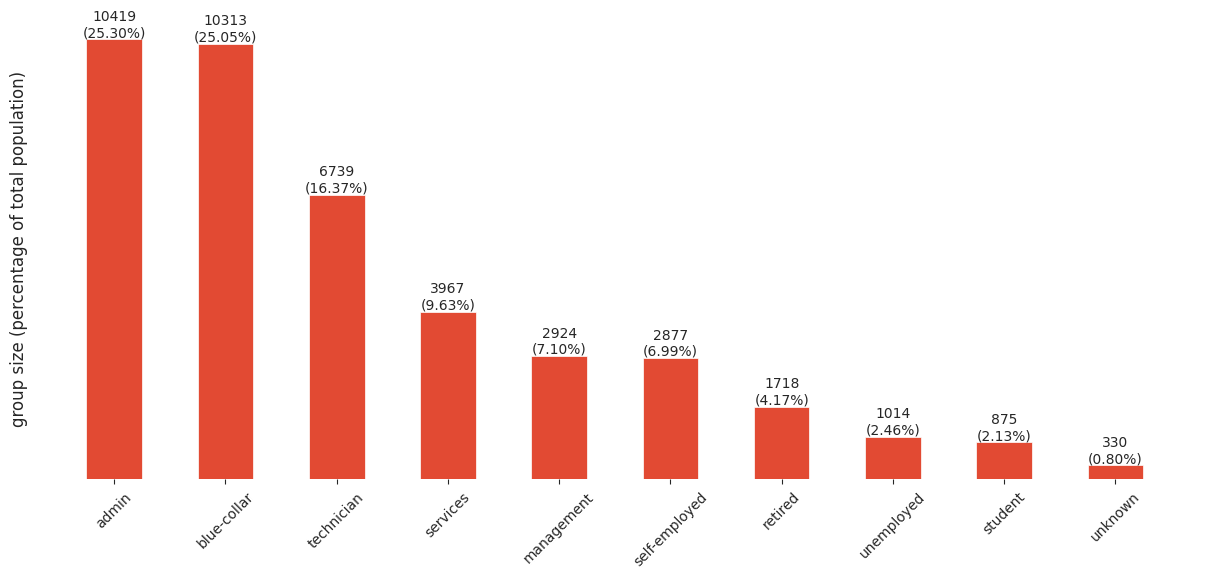

In [35]:
counts = df_bank['job'].value_counts().tolist()

# Calculate value counts and percentages
percentages = df_bank['job'].value_counts(normalize=True) * 100

# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(15, 6))

# Create the bar chart on the axes
bars = ax.bar(percentages.index, percentages.values, width = 0.5)

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Add text annotations
for bar, count, percent in zip(bars, counts, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{count}\n({percent:.2f}%)',
            ha='center', va='bottom')

# Remove the frame (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Keep the axes (ticks and labels)
ax.xaxis.set_ticks_position('bottom')

# Remove y-axis ticks
ax.yaxis.set_ticks([])

#plt.xlabel('')
plt.ylabel('group size (percentage of total population)')
plt.show()

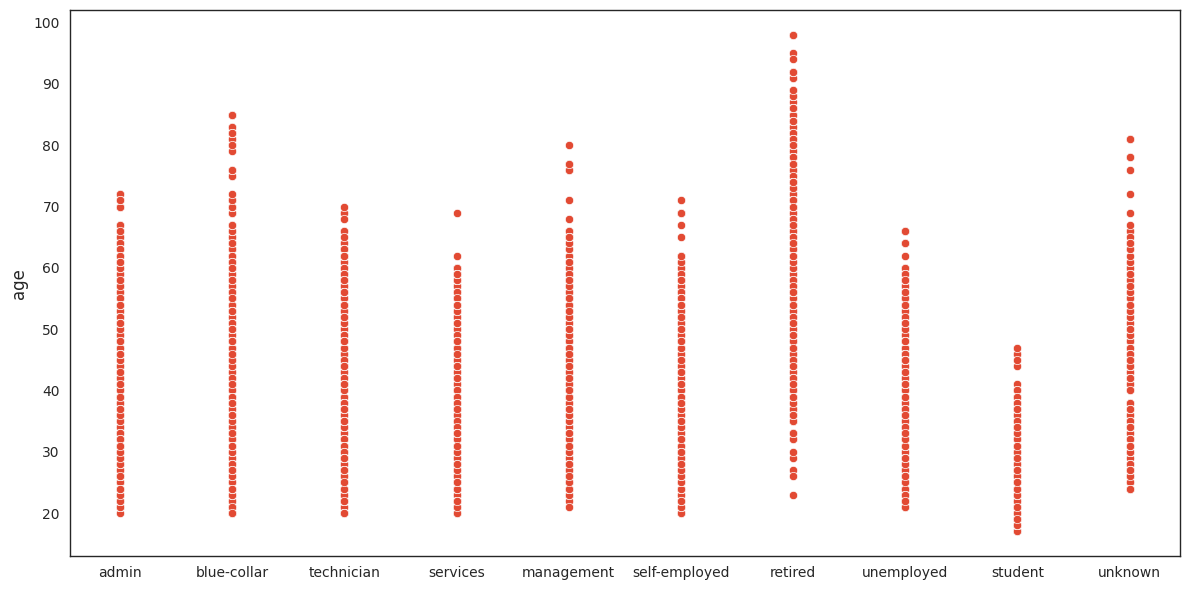

In [29]:
# Sort DataFrame by value counts of 'category'
df_bank['job'] = pd.Categorical(df_bank['job'], categories=df_bank['job'].value_counts().index)
df = df_bank.sort_values('job')

plt.figure(figsize=(12, 6))

# Create the scatter plot
ax = sns.scatterplot(x='job', y='age', data=df_bank)

ax.set_xlabel(None)

plt.tight_layout()

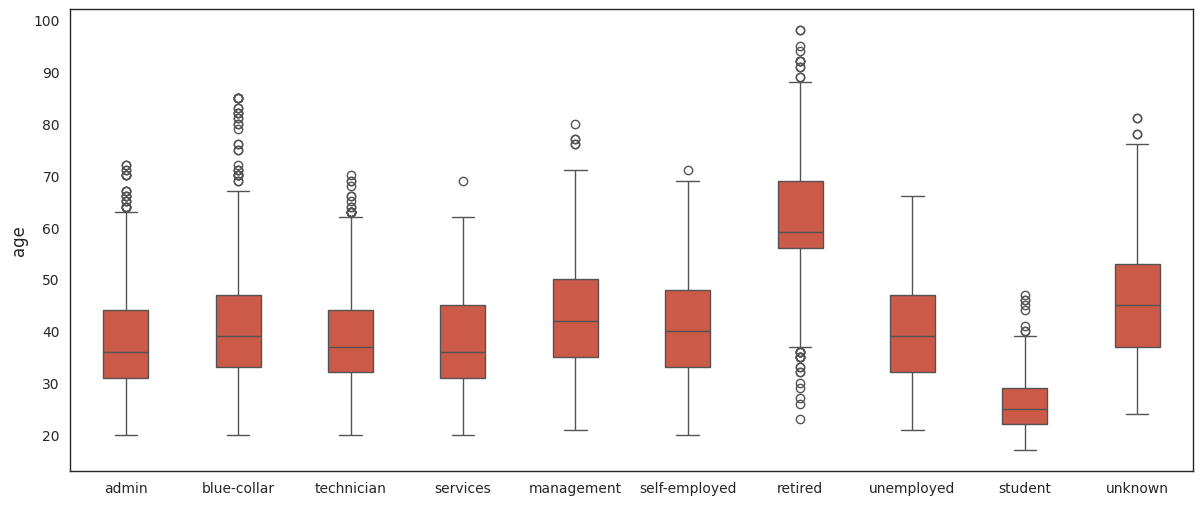

In [33]:
df = df_bank[['job', 'age']]

# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(14.5, 6))

# Calculate value counts and determine the order
category_order = df_bank['job'].value_counts().index

ax = sns.boxplot(x="job", y="age", data=df, order=category_order, width=0.4)

ax.set(xlabel=None)
plt.show()

read a boxplot
* The dashes "__" at the bottom and the top represent the range from 0% to 100%.
* The colored box is the data points from 25% to 75%.
* The bolded dash "**__**" in the colored box indicates the 50%, AKA, median.
* The little circles below the bottom dash or above the top dash are outliers.
* Take "retired" group for example, most data points are from 35 years old to 90 years old. The median age of this group is 55 years old. The outliers in this group can be as small as 23 years old or as big as 98 years old.

use boxplot to detect anomaly
* In this case, the median age of retired is 55 years old, the biggest median among all groups. This is expected.
* If the median age of retired, say, is 25 years old, the same as student, then, there can be a data integrity issue or during that period of time there was something unusual happening that leads to wealth boost among young generations.












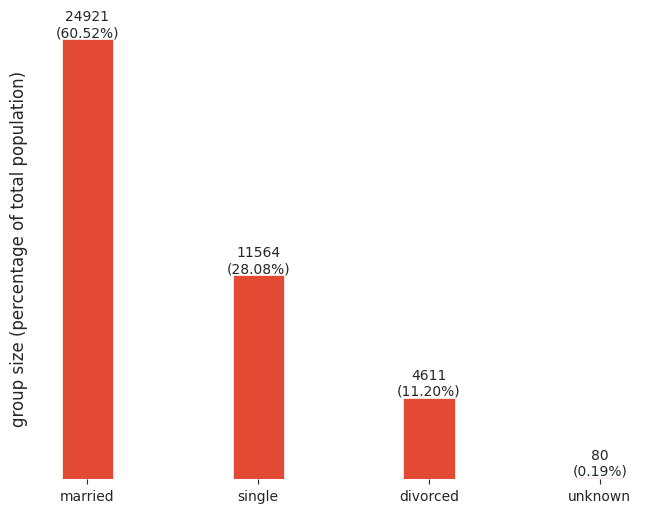

In [51]:
counts = df_bank['marital'].value_counts().tolist()

# Calculate value counts and percentages
percentages = df_bank['marital'].value_counts(normalize=True) * 100

# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart on the axes
bars = ax.bar(percentages.index, percentages.values, width = 0.3)

# Rotate x-axis tick labels
plt.xticks(rotation=0)

# Add text annotations
for bar, count, percent in zip(bars, counts, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{count}\n({percent:.2f}%)',
            ha='center', va='bottom')

# Remove the frame (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Keep the axes (ticks and labels)
ax.xaxis.set_ticks_position('bottom')

# Remove y-axis ticks
ax.yaxis.set_ticks([])

#plt.xlabel('')
plt.ylabel('group size (percentage of total population)')
plt.show()

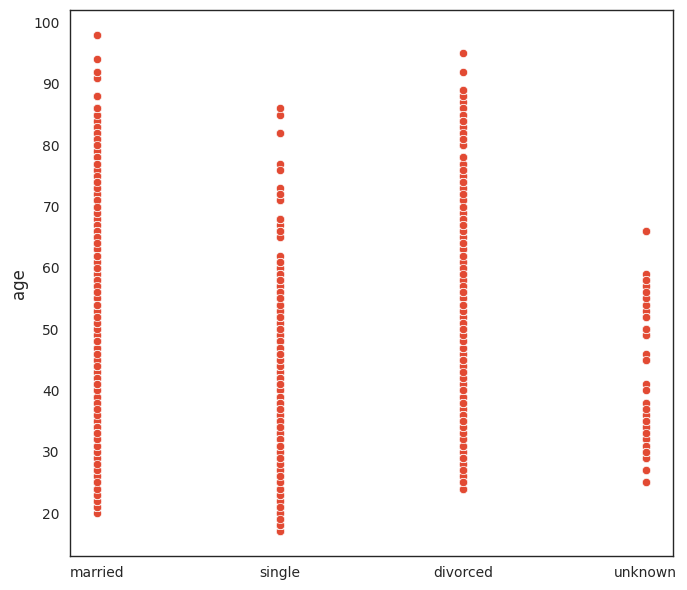

In [54]:
# Sort DataFrame by value counts of 'category'
df_bank['marital'] = pd.Categorical(df_bank['marital'], categories=df_bank['marital'].value_counts().index)
df = df_bank.sort_values('marital')

plt.figure(figsize=(7, 6))

# Create the scatter plot
ax = sns.scatterplot(x='marital', y='age', data=df_bank)

ax.set_xlabel(None)

plt.tight_layout()

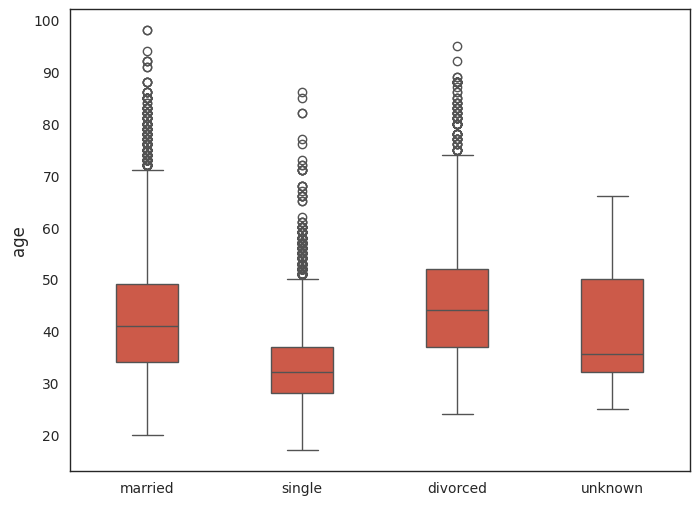

In [52]:
df_mari = df_bank[['marital', 'age']]

# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.boxplot(x="marital", y="age", data=df_mari,
                 order=['married', 'single', 'divorced', 'unknown'],
                 width=0.4)
ax.set(xlabel=None)

plt.show()

The same logic as what is used in jobs as mentioned above, there is nothing abnormal in the relationship between age and marital status because the median age of divorced is older than married people median age. Logically, one canNOT be divorced if that person did NOT marry. If the median age of married group is bigger than it is in the group of married people, either there is a data integrity issue or, somehow, there was a large number of newly married young people getting divorced back then.

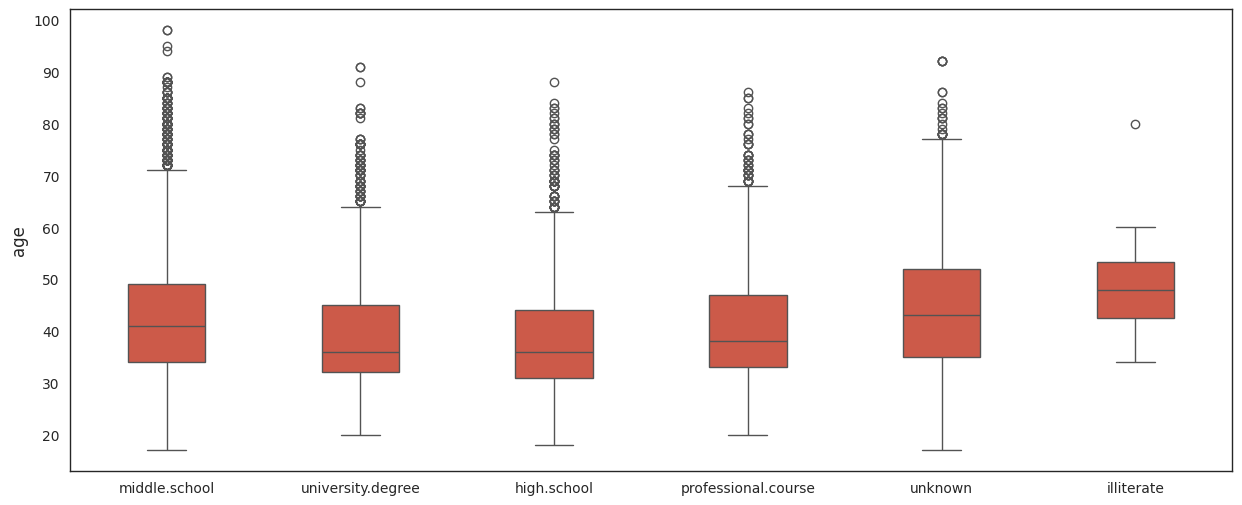

In [38]:
df_edu = df_bank[['education', 'age']]

# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.boxplot(x="education", y="age", data=df_edu,
                 order=['middle.school', 'university.degree', 'high.school', 'professional.course', 'unknown', 'illiterate'],
                 width=0.4)
ax.set(xlabel=None)
plt.show()

# 5.1 start with THE ONE question "Should the bank replace the current model?"

In [ ]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.2f}% ({v:d})'.format(pct, v=val)
        return my_format

([<matplotlib.patches.Wedge at 0x792ab0318910>,
 [Text(-1.096268477801298, -0.09052858432133395, 'no'),
  Text(1.2955900242281997, 0.10698826627426662, 'yes')],
 [Text(-0.5979646242552534, -0.04937922781163669, '88.73% (36537)'),
  Text(0.7972861687558151, 0.06583893309185637, '11.27% (4639)')])

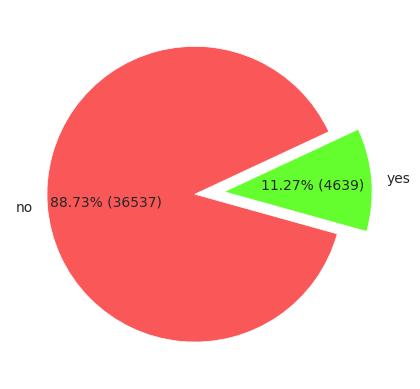

In [ ]:
term_deposit_subscription = df_bank['term_deposit_subscription'].value_counts()
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)
plt.pie(term_deposit_subscription, explode=explode, colors=colors,
        labels = term_deposit_subscription.index, startangle=25, autopct=autopct_format(term_deposit_subscription))

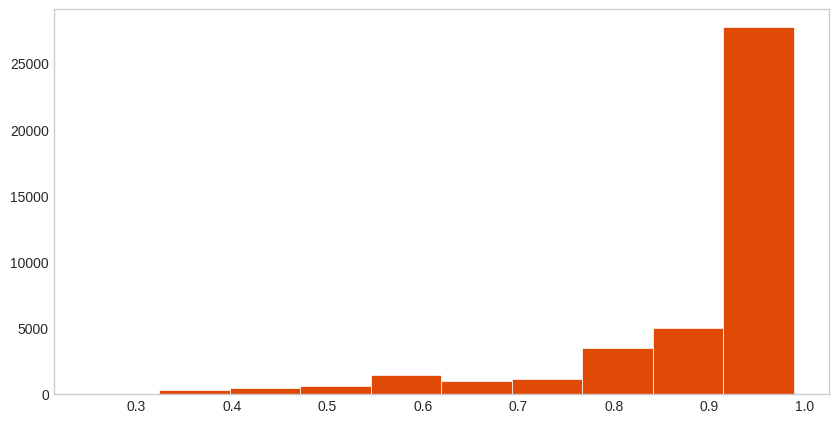

In [ ]:
df_bank['ModelPrediction'].hist(bins=10, figsize=(10, 5), color='#E14906')

# Remove grid lines
plt.grid(False)



*   11.27% of the total population subscribed a term deposit, meaning the majority of the population did NOT subscribe a term deposit.
*   The majority of ModelPerformance is over 0.9 that indicates that the majority of the population were highly likely to subscribe a term depoist.
*  The answer to the question is "**Yes, the bank should replace the current model since the predioction is mostly contradicted to the reality.**"





# 5.2 continue with analytical questions:

# 5.2.1 Supposedly, how many leads had the money to subscribe a term deposit?


In [ ]:
# get the number of people who had no housing loan OR no personal loan
df_no_loan = df_bank[(df_bank['housing_loan'] == 'no') | (df_bank['personal_loan'] == 'no')]
df_no_loan.shape

(36495, 24)

In [ ]:
# get the number of people who had no housing loan AND no personal loan
df_no_loans = df_bank[(df_bank['housing_loan'] == 'no') & (df_bank['personal_loan'] == 'no')]
df_no_loans.shape

(16058, 24)

([<matplotlib.patches.Wedge at 0x7a5cfc538110>,
 [Text(-1.0963565932122283, -0.08945513132334344, 'no'),
  Text(1.295694163038093, 0.10571960967112831, 'yes')],
 [Text(-0.5980126872066699, -0.04879370799455096, '88.70% (32372)'),
  Text(0.7973502541772879, 0.06505822133607896, '11.30% (4123)')])

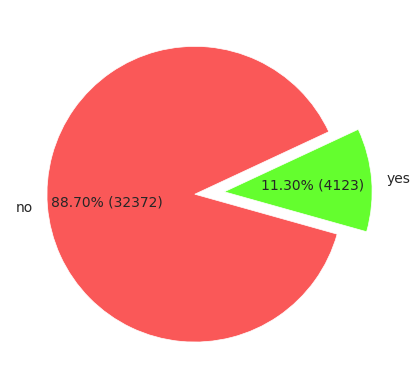

In [ ]:
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)

loan = df_no_loan['term_deposit_subscription'].value_counts()
plt.pie(loan, explode=explode, colors=colors, labels = loan.index, startangle=25, autopct=autopct_format(loan))



*   36495, 88.63% of the total population, did NOT have loans. Therefore, the answer to the question on the number of leads who had the money to subscribe a term deposit is "**Supposedly, 36495 leads had the money to subscribed a term deposit.**"
*   ONLY 4123 (11.30% of 36495 leads who did not have any loans), a small portion of the leads who had the access to a term deposit subscription in terms of financial viability did materialize it.



# 5.2.2 Could it be because default record affected the creditability/qualification to subscribe a term deposit?  

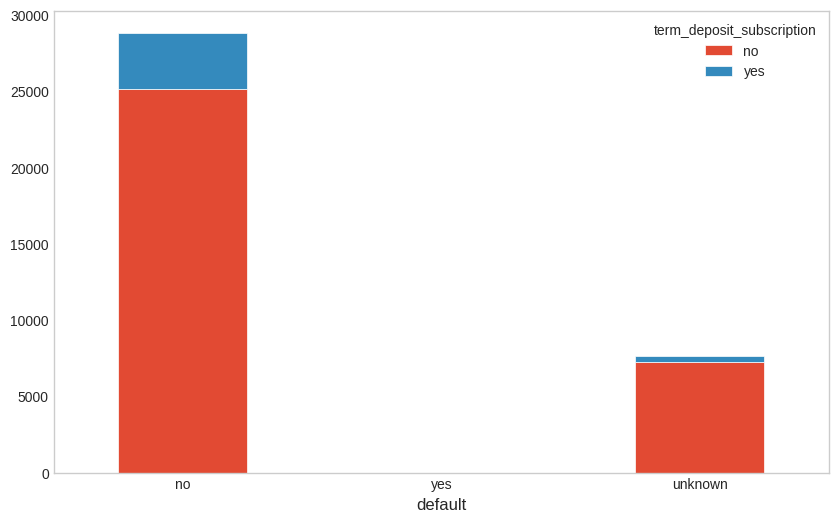

In [ ]:
pd.crosstab(
    df_no_loan['default'],df_no_loan['term_deposit_subscription'],
    rownames=['default'], colnames=['term_deposit_subscription']
    ).loc[['no', 'yes', 'unknown']].plot(kind="bar",stacked=True, figsize=(10, 6), rot=0)

# Remove grid lines
plt.grid(False)

([<matplotlib.patches.Wedge at 0x7ecfd19f77d0>,
 [Text(-0.8700374009523908, 0.6730786885231244, 'no'),
  Text(0.8698635047822708, -0.6733034108393514, 'unknown'),
  Text(1.0999999632807473, -0.0002842223684113975, 'yes')],
 [Text(-0.47456585506494037, 0.36713383010352235, '79.04% (28846)'),
  Text(0.47447100260851127, -0.36725640591237346, '20.95% (7646)'),
  Text(0.5999999799713167, -0.00015503038276985318, '0.01% (3)')])

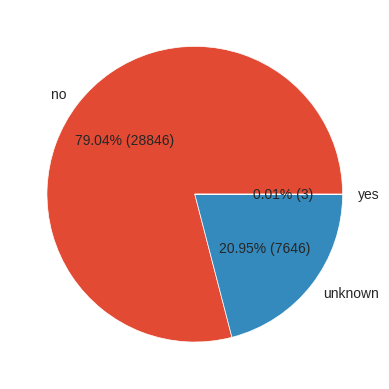

In [ ]:
no_loan_default = df_no_loan['default'].value_counts()
plt.pie(no_loan_default,labels = no_loan_default.index, autopct=autopct_format(no_loan_default))



*   The mass did NOT have a record of defult. Hence, the answer to the question if it was default record blocked people on term depsoit subscription is "**No, because most people without loan did NOT have any default.**"
*   The above is deduction, NOT correlation or causation.



# 5.2.3 Could it be about unemployment that froced people to live on their savings instead of using the money to subscribe a term deposit?

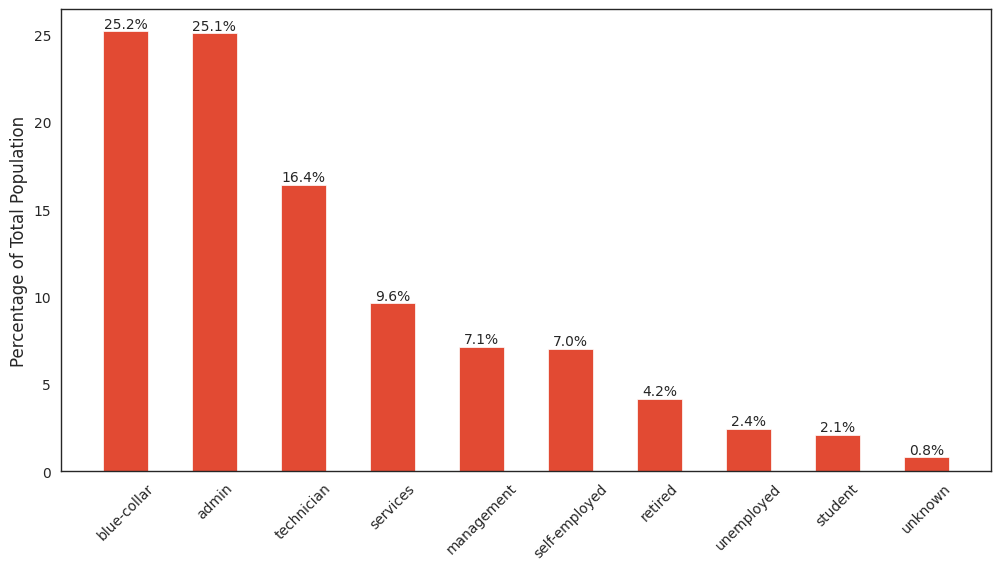

In [ ]:
# Calculate value counts and percentages
percentages = df_no_loan['job'].value_counts(normalize=True) * 100

# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar chart on the axes
bars = ax.bar(percentages.index, percentages.values, width = 0.5)

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# plt.xlabel('')
plt.ylabel('Percentage of Total Population')
# plt.title('')
plt.show()

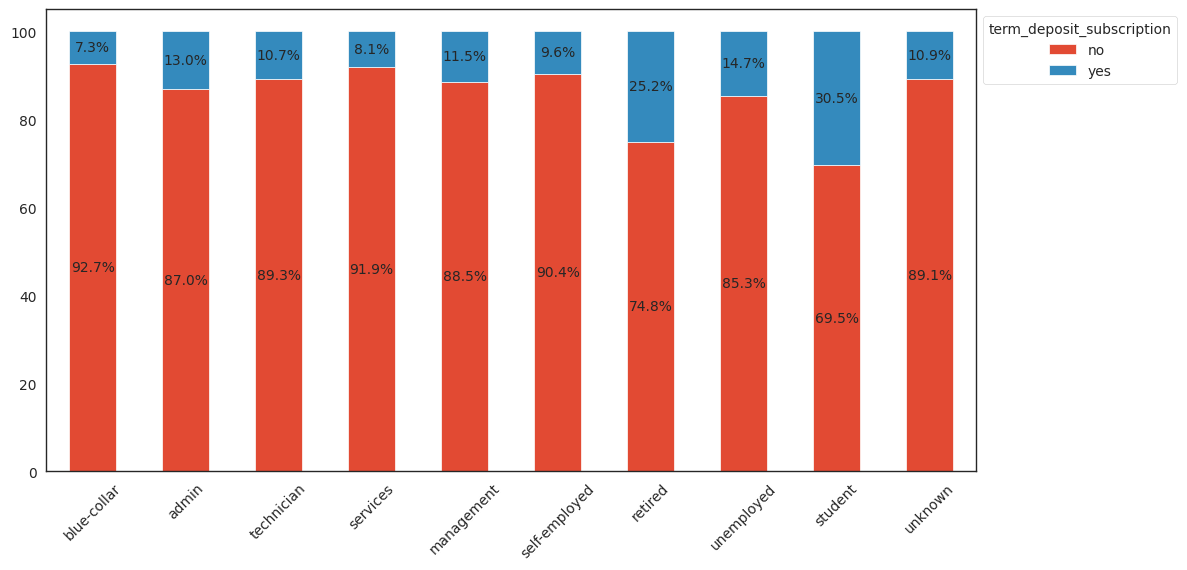

In [ ]:
ct = pd.crosstab(
    df_no_loan['job'],df_no_loan['term_deposit_subscription'],
    rownames=['job'], colnames=['term_deposit_subscription']
    )

# Normalize the data to percentages
cross_tab_percentages = ct.div(ct.sum(axis=1), axis=0).mul(100)

# Calculate total counts for each category
total_counts = df_no_loan['job'].value_counts()

# Order the categories based on total counts
ordered_jobs = total_counts.sort_values(ascending=False).index

# Reindex the crosstab to match the desired order
cross_tab_percentages_ordered = cross_tab_percentages.reindex(ordered_jobs)

ax = cross_tab_percentages_ordered.plot(kind='bar', stacked=True, figsize=(12, 6), rot=45)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

ax.legend(title='term_deposit_subscription', loc='best', bbox_to_anchor=(1, 1))

# Remove x-axis label
ax.set_xlabel(None)

# Remove grid lines
plt.grid(False)

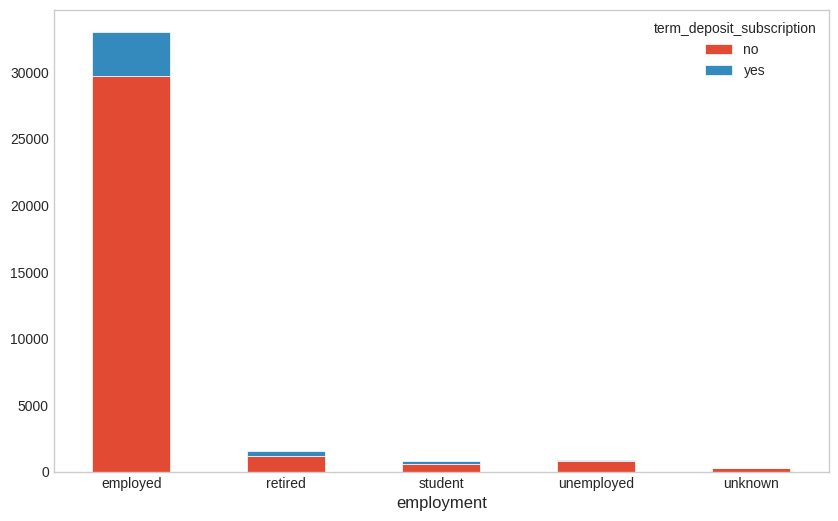

In [ ]:
pd.crosstab(df_no_loan['employment'],df_no_loan['term_deposit_subscription'],
            rownames=['employment'], colnames=['term_deposit_subscription']
           ).plot(kind="bar",stacked=True, figsize=(10, 6), rot=0)

# Remove grid lines
plt.grid(False)

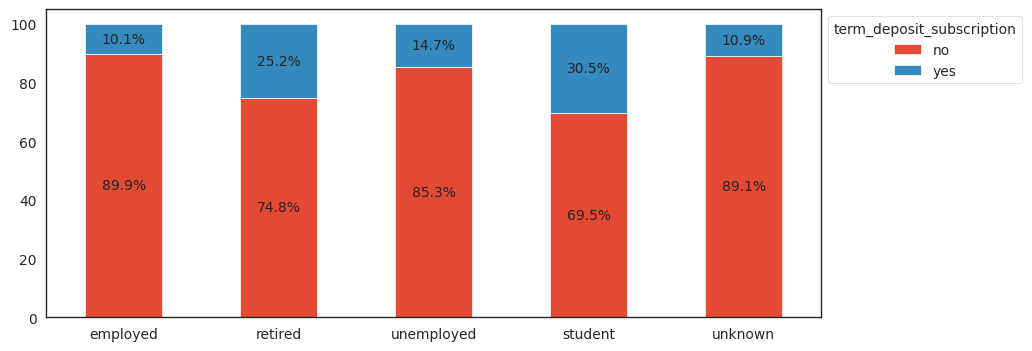

In [ ]:
ct = pd.crosstab(
    df_no_loan['employment'],df_no_loan['term_deposit_subscription'],
    rownames=['employment'], colnames=['term_deposit_subscription']
    )

# Normalize the data to percentages
cross_tab_percentages = ct.div(ct.sum(axis=1), axis=0).mul(100)

# Calculate total counts for each category
total_counts = df_no_loan['employment'].value_counts()

# Order the categories based on total counts
ordered_jobs = total_counts.sort_values(ascending=False).index

# Reindex the crosstab to match the desired order
cross_tab_percentages_ordered = cross_tab_percentages.reindex(ordered_jobs)

ax = cross_tab_percentages_ordered.plot(kind='bar', stacked=True, figsize=(10, 4), width=0.5, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

ax.legend(title='term_deposit_subscription', loc='best', bbox_to_anchor=(1, 1))

# Remove x-axis label
ax.set_xlabel(None)

# Remove grid lines
plt.grid(False)

([<matplotlib.patches.Wedge at 0x7b6b3da1ba90>,
 [Text(-1.0512336761071037, 0.32389467148803974, 'employed'),
  Text(0.9822154868468184, -0.49522998434895654, 'retired'),
  Text(1.0631832799335241, -0.2822079255970566, 'unemployed'),
  Text(1.0925365010622272, -0.12792182709258995, 'student'),
  Text(1.0996501246471493, -0.027741726036950902, 'unknown')],
 [Text(-0.573400186967511, 0.17666982081165802, '90.49% (33023)'),
  Text(0.5357539019164463, -0.27012544600852173, '4.16% (1519)'),
  Text(0.5799181526910131, -0.15393159578021268, '2.44% (892)'),
  Text(0.5959290005793966, -0.06977554205050361, '2.10% (768)'),
  Text(0.599809158898445, -0.01513185056560958, '0.80% (293)')])

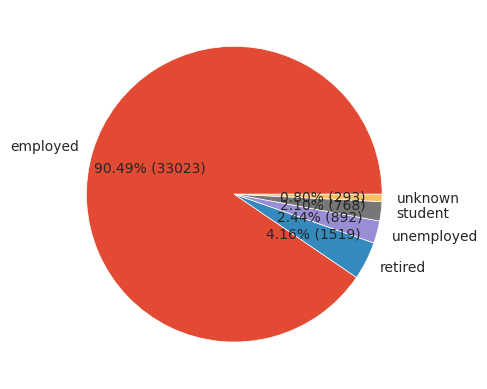

In [ ]:
no_loan = df_no_loan['employment'].value_counts()
plt.pie(no_loan,labels = no_loan.index, autopct=autopct_format(no_loan))

In [ ]:
df_no_loan_emp = df_no_loan[(df_no_loan['employment'] == 'employed')]
df_no_loan_emp.shape

(33023, 24)

([<matplotlib.patches.Wedge at 0x7ecfc823c8d0>,
 [Text(-1.0923116361481655, -0.12982792278750352, 'no'),
  Text(1.2909137482201096, 0.1534330298739758, 'yes')],
 [Text(-0.5958063469899083, -0.07081523061136555, '89.88% (29680)'),
  Text(0.7944084604431442, 0.0944203260762928, '10.12% (3343)')])

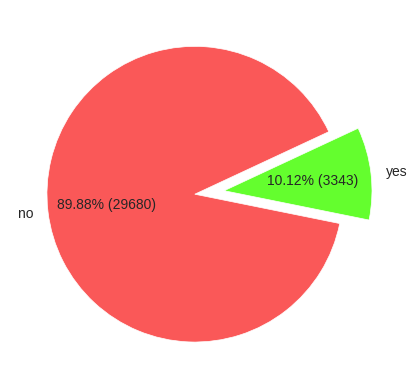

In [ ]:
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)

loan_emp = df_no_loan_emp['term_deposit_subscription'].value_counts()
plt.pie(loan_emp, explode=explode, colors=colors, labels = loan_emp.index, startangle=25, autopct=autopct_format(loan_emp))



*   The vast majority of the leads with NO loan were employed.
*   There was a great number of the total population did NOT have a loan and did have a job.
*   This great number of people did NOT have to live on their savings and could have used the money to subscribe a term deposit. Based on that, the answer to the question on possible impact from unemployment is "**No, unemployment was not impactful as it takes an unsignificant part of the leads without loan.**"
*   With the above having said, most of them (29680) did NOT subscribe a term deposit.







# 5.2.4 Could it be related to marital status? For example, most employed people who did not have a loan had children and their money was spent on taking care of kids.

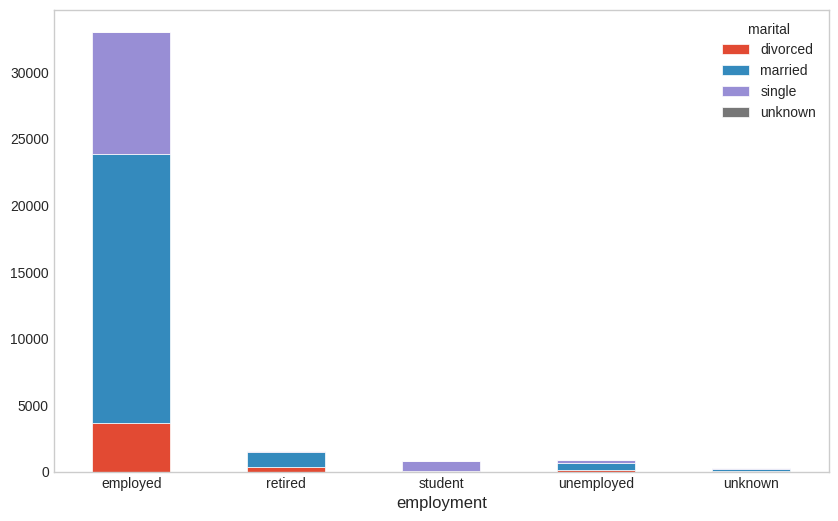

In [ ]:
pd.crosstab(df_no_loan['employment'],df_no_loan['marital'],
            rownames=['employment'], colnames=['marital']).plot(
                kind="bar",stacked=True, figsize=(10, 6), rot=0)

# Remove grid lines
plt.grid(False)

([<matplotlib.patches.Wedge at 0x7ecfc7b47750>,
 [Text(-0.3762494275326132, 1.0336519570345626, 'married'),
  Text(-0.0046568592714198885, -1.099990142529344, 'single'),
  Text(1.0300808772352683, -0.3859188857185153, 'divorced'),
  Text(1.0999854845190074, -0.005651004112943347, 'unknown')],
 [Text(-0.20522696047233444, 0.5638101583824886, '61.11% (20181)'),
  Text(-0.002540105057138121, -0.5999946231978239, '27.64% (9128)'),
  Text(0.5618622966737826, -0.2105012103919174, '11.08% (3660)'),
  Text(0.5999920824649131, -0.0030823658797872796, '0.16% (54)')])

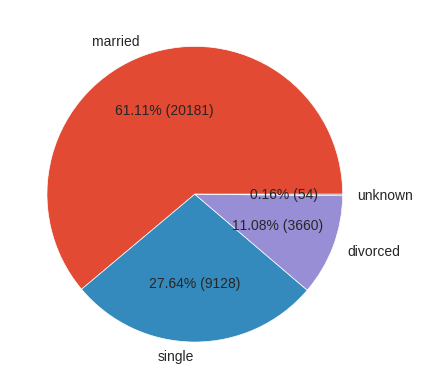

In [ ]:
no_loan_emp_marital = df_no_loan_emp['marital'].value_counts()
plt.pie(no_loan_emp_marital,labels = no_loan_emp_marital.index, autopct=autopct_format(no_loan_emp_marital))

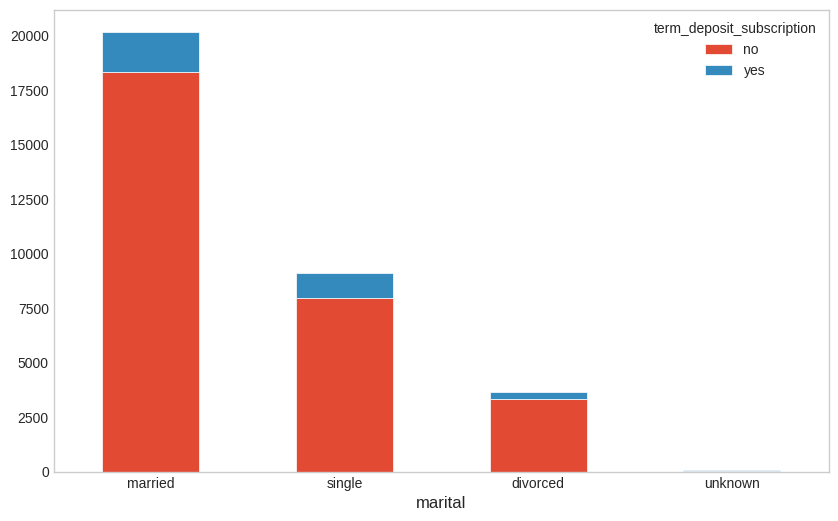

In [ ]:
pd.crosstab(
    df_no_loan_emp['marital'],df_no_loan_emp['term_deposit_subscription'],
    rownames=['marital'], colnames=['term_deposit_subscription']
    ).loc[['married', 'single', 'divorced', 'unknown']].plot(
        kind="bar",stacked=True, figsize=(10, 6), rot=0)

# Remove grid lines
plt.grid(False)



*   Among the people with NO loan, the major part was with a job.
*   Most of the people mentioned above were either married or single.

*   The majority of married and single people who did not have a loan and did have a job did NOT subscribe a term deposit.





In [ ]:
df_no_loan_emp_single = df_no_loan_emp[(df_no_loan_emp['marital'] == 'single')]
df_no_loan_emp_single.shape

(9128, 24)

([<matplotlib.patches.Wedge at 0x7cdd2866c550>,
 [Text(-1.0991861053048535, -0.042307279571577774, 'no'),
  Text(1.2990381244511906, 0.04999951222095539, 'yes')],
 [Text(-0.599556057439011, -0.02307669794813333, '87.34% (7972)'),
  Text(0.799408076585348, 0.03076893059751101, '12.66% (1156)')])

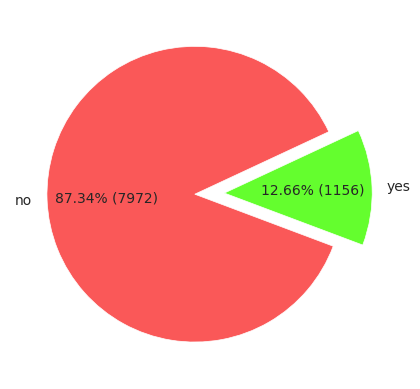

In [ ]:
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)

loan_emp_single = df_no_loan_emp_single['term_deposit_subscription'].value_counts()
plt.pie(loan_emp_single, explode=explode, colors=colors, labels = loan_emp_single.index, startangle=25, autopct=autopct_format(loan_emp_single))



*   The answer to the question on the relationship between marital status and term deposit subscription is "**It may be related to marital status. Only about 30% of the leads who did not have a loan and did have a job were single, and that number takes up 20% or so of the total population (v.s about 10% of the total population subscribed a term deposit).**"
*   There was a missing opportunity of 7972 singles who could have subscribed a term deposit.



In [ ]:
df_no_loan_emp_married = df_no_loan_emp[(df_no_loan_emp['marital'] == 'married')]
df_no_loan_emp_married.shape

(20181, 24)

([<matplotlib.patches.Wedge at 0x7ecfc7446f90>,
 [Text(-1.0878940115195357, -0.1627471035070443, 'no'),
  Text(1.285692904696965, 0.1923376063381284, 'yes')],
 [Text(-0.5933967335561102, -0.08877114736747871, '90.84% (18332)'),
  Text(0.7911956336596708, 0.11836160390038669, '9.16% (1849)')])

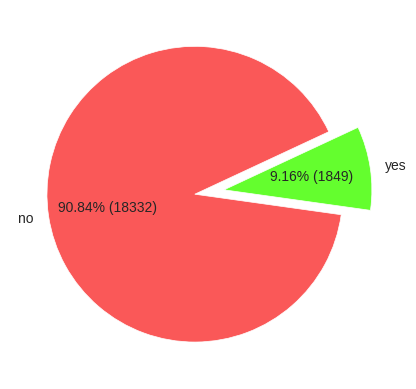

In [ ]:
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)

loan_emp_married = df_no_loan_emp_married['term_deposit_subscription'].value_counts()
plt.pie(loan_emp_married, explode=explode, colors=colors, labels = loan_emp_married.index, startangle=25, autopct=autopct_format(loan_emp_married))



*   Though there was no data points on having kids or not, married people may be a segmentation with opportunity since married people are expected to be more serious about financial planning.
*   18332 married people, almost half of the total population, had no loan and a job. There should be an opportunity for term deposit subscription.



# 5.2.5 Could it be the macro ecnomy? A projected growing economy entices people into spending more rather than saving more.

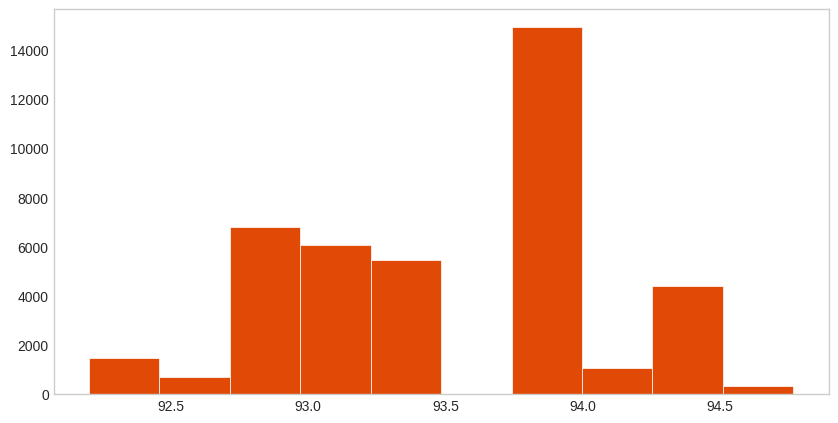

In [ ]:
df_bank['cons.price.idx'].hist(bins=10, figsize=(10, 5), color='#E14906')

# Remove grid lines
plt.grid(False)

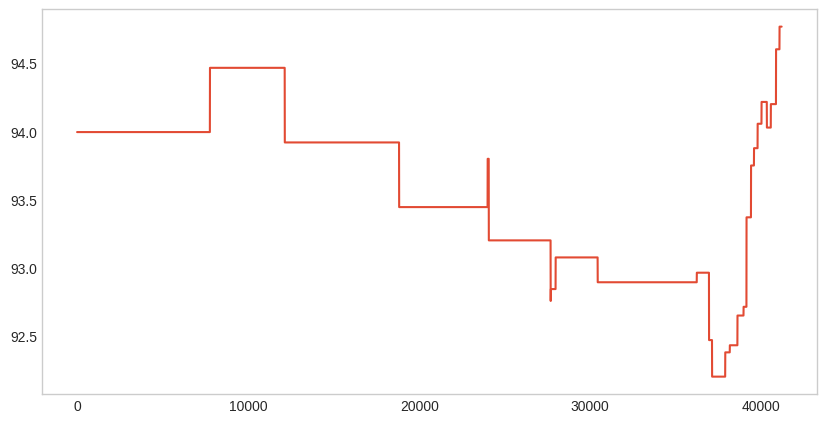

In [ ]:
df_bank['cons.price.idx'].plot( figsize=(10, 5)) # Plots 'col1' against the index

# Remove grid lines
plt.grid(False)

plt.show()

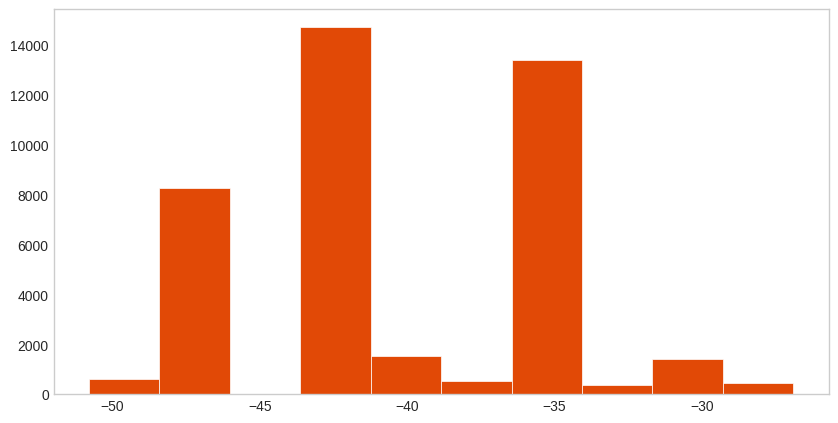

In [ ]:
df_bank['cons.conf.idx'].hist(bins=10, #bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                figsize=(10, 5), color='#E14906')

# Remove grid lines
plt.grid(False)

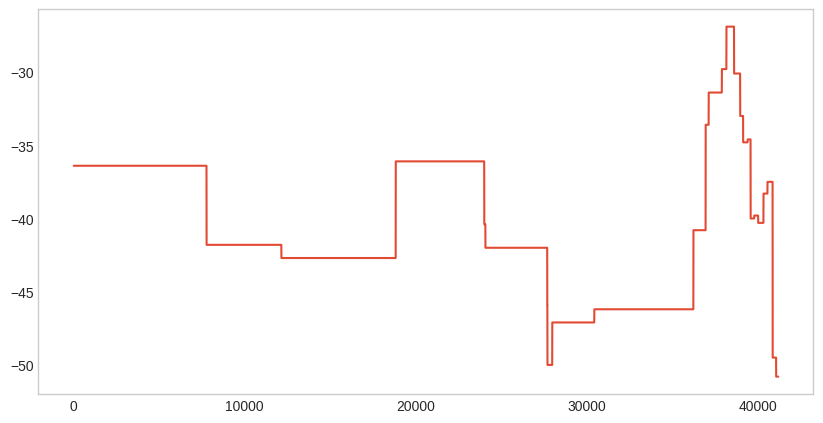

In [ ]:
df_bank['cons.conf.idx'].plot( figsize=(10, 5)) # Plots 'col1' against the index

# Remove grid lines
plt.grid(False)

plt.show()



*   The two line graphs demonstrate the trend of consumer price index (monthly indicator) and consumer confidence index (monthly indicator) from May 2008 to November 2010.
*   Untill some time in 2010, consumers did NOT have much confidence in spending.

*   The answer to the question on macro economy is "**People, back then, did NOT favor spending more.**"





# 5.2.6 How did the bank miss the primary potential clients, the singles with a job and no loan, and the secondary potential clients, the married people who takes financial planning seriously?  

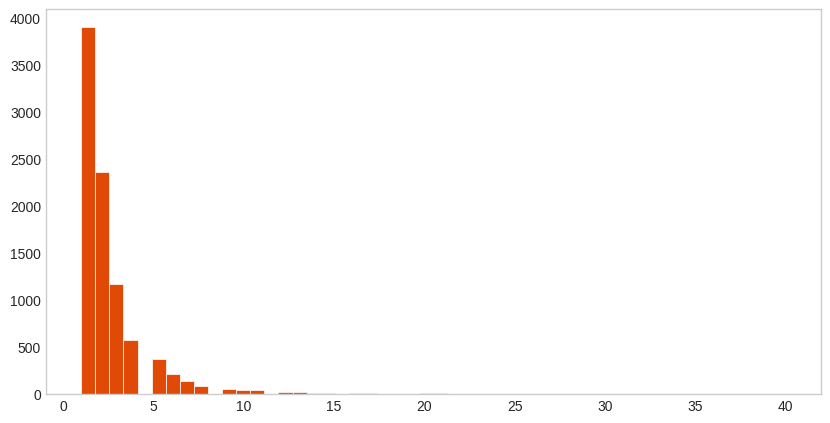

In [ ]:
df_no_loan_emp_single['contact_ct_during_this_campaign'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

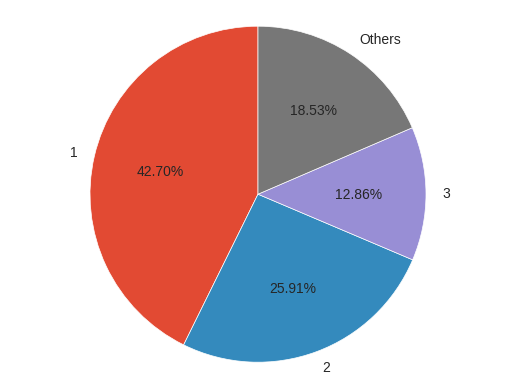

In [ ]:
contact_ct_during_no_loan_emp_single = df_no_loan_emp_single['contact_ct_during_this_campaign'].value_counts()
contact_ct_during_no_loan_emp_single = contact_ct_during_no_loan_emp_single.reset_index()
contact_ct_during_no_loan_emp_single.columns = ['contact_ct_during_this_campaign', 'count']

# Sort the DataFrame by value in descending order
contact_ct_during_no_loan_emp_single = contact_ct_during_no_loan_emp_single.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct_during_no_loan_emp_single.head(3)
others_value = contact_ct_during_no_loan_emp_single['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'contact_ct_during_this_campaign': top_3['contact_ct_during_this_campaign'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['contact_ct_during_this_campaign'], autopct='%1.2f%%', startangle=90)
#plt.title('Top 3 Categories and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

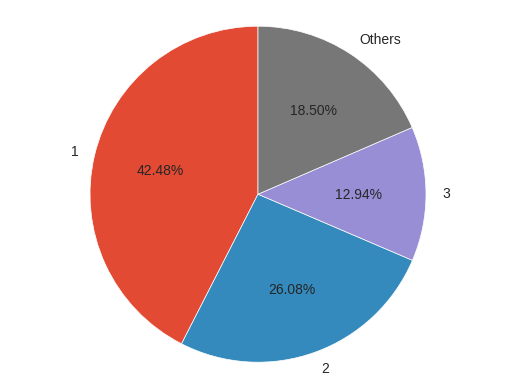

In [ ]:
contact_ct_during_no_loan_emp_married = df_no_loan_emp_married['contact_ct_during_this_campaign'].value_counts()
contact_ct_during_no_loan_emp_married = contact_ct_during_no_loan_emp_married.reset_index()
contact_ct_during_no_loan_emp_married.columns = ['contact_ct_during_this_campaign', 'count']

# Sort the DataFrame by value in descending order
contact_ct_during_no_loan_emp_married = contact_ct_during_no_loan_emp_married.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct_during_no_loan_emp_married.head(3)
others_value = contact_ct_during_no_loan_emp_married['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'contact_ct_during_this_campaign': top_3['contact_ct_during_this_campaign'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['contact_ct_during_this_campaign'], autopct='%1.2f%%', startangle=90)
#plt.title('Top 3 Categories and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

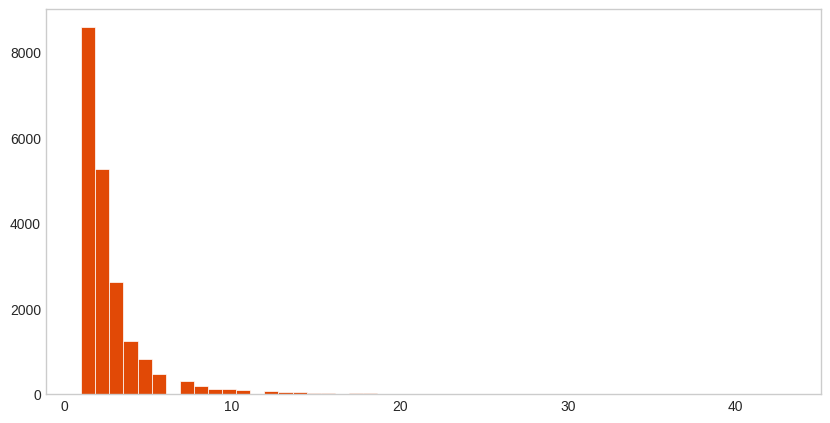

In [ ]:
df_no_loan_emp_married['contact_ct_during_this_campaign'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)



*   There was ONLY 1 call made to half of singles and married people who were with a job and no loan.
*   A little bit over 80% of singles and married people who were with a job and no loan received up to 3 calls during this campaign.



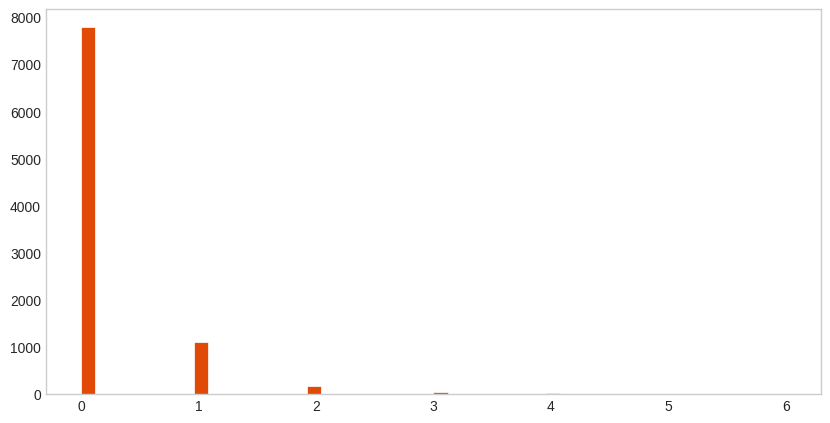

In [ ]:
df_no_loan_emp_single['contact_ct_before_this_campaign'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

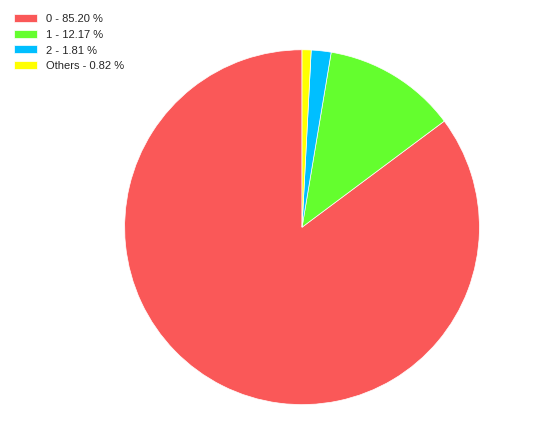

In [ ]:
contact_ct_b4_no_loan_emp_single = df_no_loan_emp_single['contact_ct_before_this_campaign'].value_counts()
contact_ct_b4_no_loan_emp_single = contact_ct_b4_no_loan_emp_single.reset_index()
contact_ct_b4_no_loan_emp_single.columns = ['contact_ct_before_this_campaign', 'count']

# Sort the DataFrame by value in descending order
contact_ct_b4_no_loan_emp_single = contact_ct_b4_no_loan_emp_single.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct_b4_no_loan_emp_single.head(3)
others_value = contact_ct_b4_no_loan_emp_single['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'contact_ct_before_this_campaign': top_3['contact_ct_before_this_campaign'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Assuming 'y' should represent the 'count' column in 'plot_data' and 'x' should represent the 'contact_ct_before_this_campaign' column
y = plot_data['count']  # Assign data to 'y'
x = plot_data['contact_ct_before_this_campaign']  # Assign data to 'x', if needed for labels

# Define colors if not already defined
colors = ['#FA5858', '#64FE2E', '#00BFFF', '#FFFF00']  # Example colors

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)

# Calculate percentages for labels
porcent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))


plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')


#plt.show()

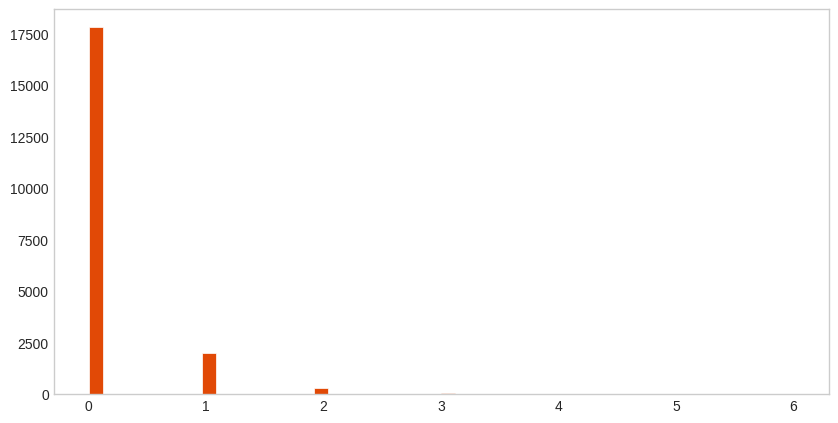

In [ ]:
df_no_loan_emp_married['contact_ct_before_this_campaign'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

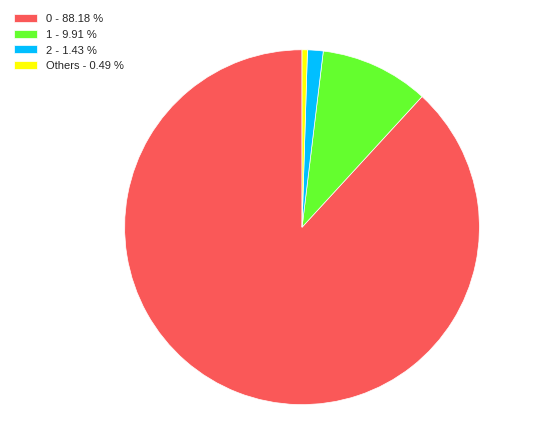

In [ ]:
contact_ct_b4_no_loan_emp_married = df_no_loan_emp_married['contact_ct_before_this_campaign'].value_counts()
contact_ct_b4_no_loan_emp_married = contact_ct_b4_no_loan_emp_married.reset_index()
contact_ct_b4_no_loan_emp_married.columns = ['contact_ct_before_this_campaign', 'count']

# Sort the DataFrame by value in descending order
contact_ct_b4_no_loan_emp_married = contact_ct_b4_no_loan_emp_married.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct_b4_no_loan_emp_married.head(3)
others_value = contact_ct['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'contact_ct_before_this_campaign': top_3['contact_ct_before_this_campaign'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Assuming 'y' should represent the 'count' column in 'plot_data' and 'x' should represent the 'contact_ct_before_this_campaign' column
y = plot_data['count']  # Assign data to 'y'
x = plot_data['contact_ct_before_this_campaign']  # Assign data to 'x', if needed for labels

# Define colors if not already defined
colors = ['#FA5858', '#64FE2E', '#00BFFF', '#FFFF00']  # Example colors

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)

# Calculate percentages for labels
porcent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))


plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')


#plt.show()



*   Over 80% of singles and married people who were with a job and no loan did NOT  receive any calls before this campaign.
*   There should NOT be "blocking the contact" issue preventing telemarkers from reaching out even if that was an option back then.



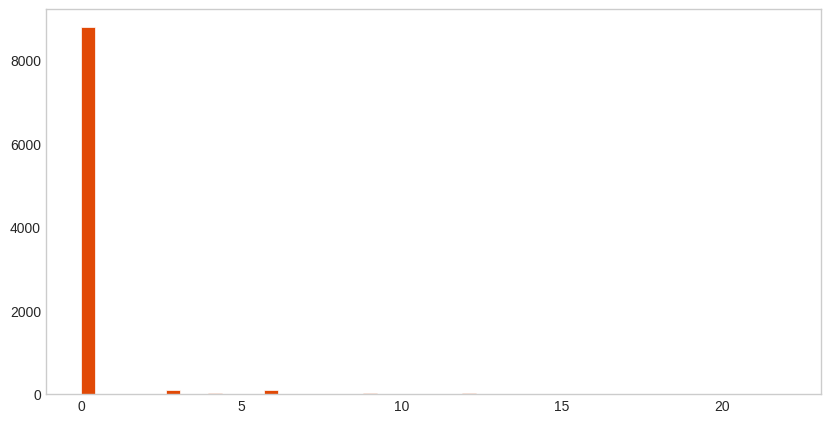

In [ ]:
df_no_loan_emp_single['days_since_last_contact'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

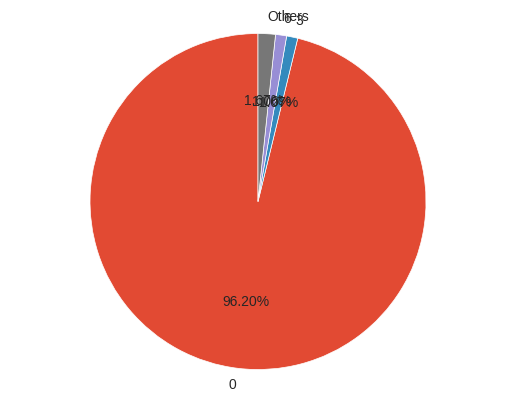

In [ ]:
dys_ct_last_no_loan_emp_single = df_no_loan_emp_single['days_since_last_contact'].value_counts()
dys_ct_last_no_loan_emp_single = dys_ct_last_no_loan_emp_single.reset_index()
dys_ct_last_no_loan_emp_single.columns = ['days_since_last_contact', 'count']

# Sort the DataFrame by value in descending order
dys_ct_last_no_loan_emp_single = dys_ct_last_no_loan_emp_single.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = dys_ct_last_no_loan_emp_single.head(3)
others_value = dys_ct_last_no_loan_emp_single['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'days_since_last_contact': top_3['days_since_last_contact'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['days_since_last_contact'], autopct='%1.2f%%', startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

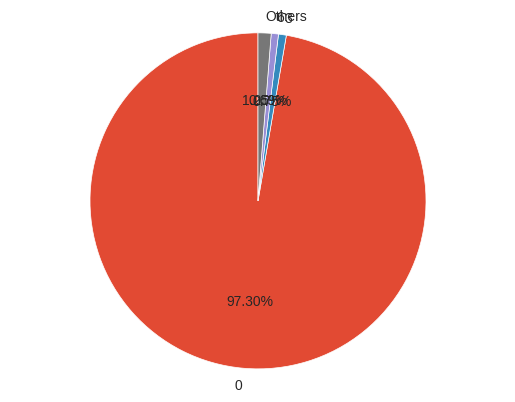

In [ ]:
dys_ct_last_no_loan_emp_married = df_no_loan_emp_married['days_since_last_contact'].value_counts()
dys_ct_last_no_loan_emp_married = dys_ct_no_loan_emp_married.reset_index()
dys_ct_last_no_loan_emp_married.columns = ['days_since_last_contact', 'count']

# Sort the DataFrame by value in descending order
dys_ct_last_no_loan_emp_married = dys_ct_no_loan_emp_married.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = dys_ct_last_no_loan_emp_married.head(3)
others_value = dys_ct_last_no_loan_emp_married['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'days_since_last_contact': top_3['days_since_last_contact'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['days_since_last_contact'], autopct='%1.2f%%', startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



*   Almost all singles and married people who were with a job and no loan were NOT previously contacted.



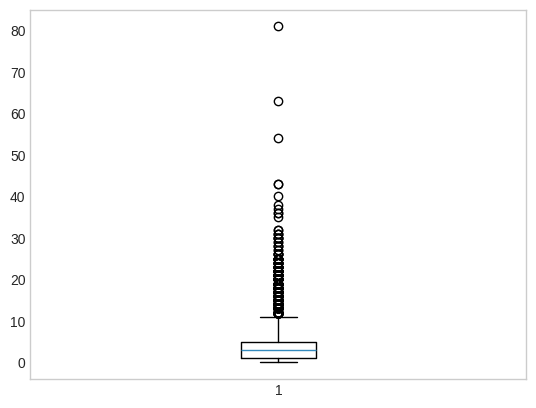

In [ ]:
plt.boxplot(df_no_loan_emp_single['last_contact_in_minute'])
# Remove grid lines
plt.grid(False)
#ax.set_title('ModelPrediction')

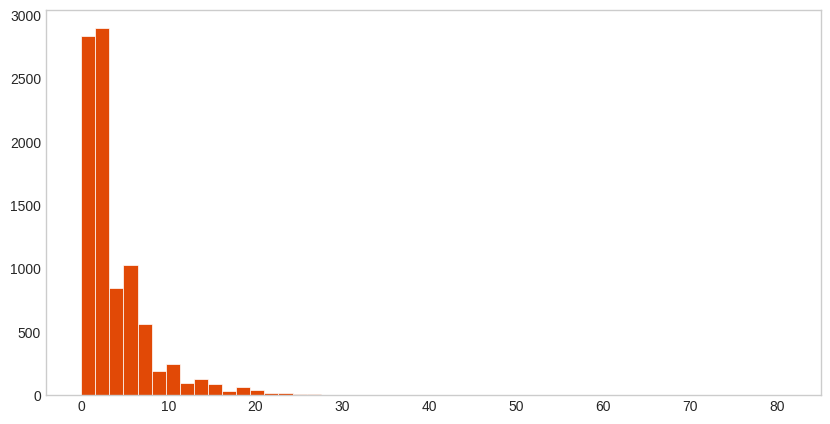

In [ ]:
df_no_loan_emp_single['last_contact_in_minute'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

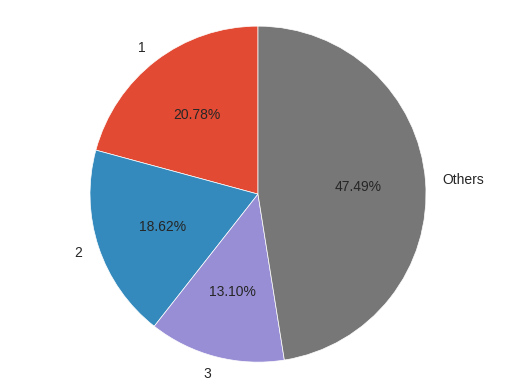

In [ ]:
last_contact_minute_no_loan_emp_single = df_no_loan_emp_single['last_contact_in_minute'].value_counts()
last_contact_minute_no_loan_emp_single = last_contact_minute_no_loan_emp_single.reset_index()
last_contact_minute_no_loan_emp_single.columns = ['last_contact_in_minute', 'count']

# Sort the DataFrame by value in descending order
last_contact_minute_no_loan_emp_single = last_contact_minute_no_loan_emp_single.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = last_contact_minute_no_loan_emp_single.head(3)
others_value = last_contact_minute_no_loan_emp_single['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'last_contact_in_minute': top_3['last_contact_in_minute'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['last_contact_in_minute'], autopct='%1.2f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

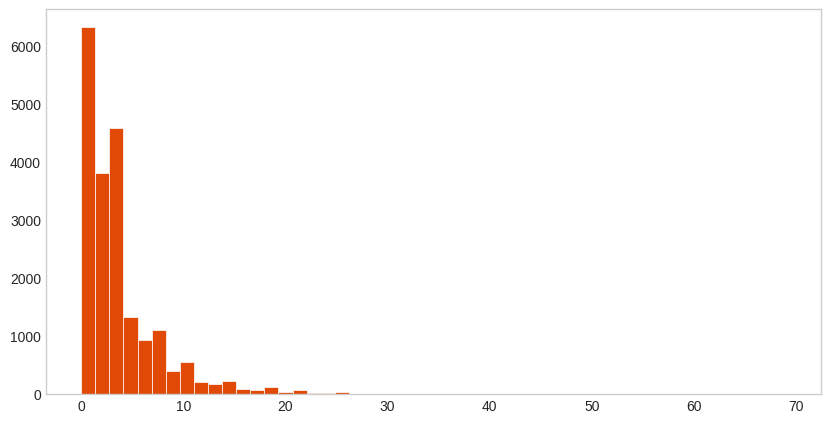

In [ ]:
df_no_loan_emp_married['last_contact_in_minute'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

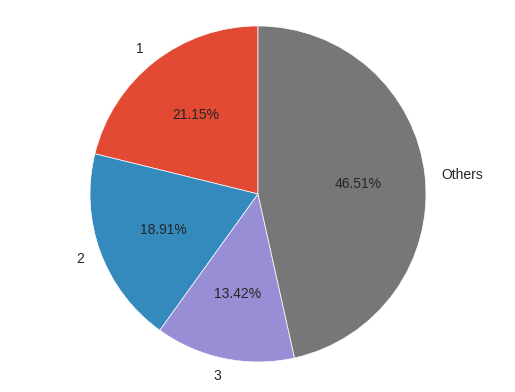

In [ ]:
last_contact_minute_no_loan_emp_married = df_no_loan_emp_married['last_contact_in_minute'].value_counts()
last_contact_minute_no_loan_emp_married = last_contact_minute_no_loan_emp_married.reset_index()
last_contact_minute_no_loan_emp_married.columns = ['last_contact_in_minute', 'count']

# Sort the DataFrame by value in descending order
last_contact_minute_no_loan_emp_married = last_contact_minute_no_loan_emp_married.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = last_contact_minute_no_loan_emp_married.head(3)
others_value = last_contact_minute_no_loan_emp_married['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'last_contact_in_minute': top_3['last_contact_in_minute'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['last_contact_in_minute'], autopct='%1.2f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



*   Calls to a little over half of singles and married people who were with a job and no loan were ended within 3 minutes.
*   3 minutes should not be long enough for promoting a term deposit.

*   The answer to the question "how the bank missed the primary and secondary potential clients" is **there was NOT frequent enough contact or long enough calls made**.
*   It is suggested that the telemarketing team revist their metrics and refine the script for the promotion on term deposit.





# 5.3 What characteristics are seen from term deposit subscribers?

In [61]:
# get the subset of subscribers of term deposit
df_bank_subscribed = df_bank[df_bank['term_deposit_subscription'] == 'yes']

# 5.3.1 What is the distribution of age in the total population and the subcribers?

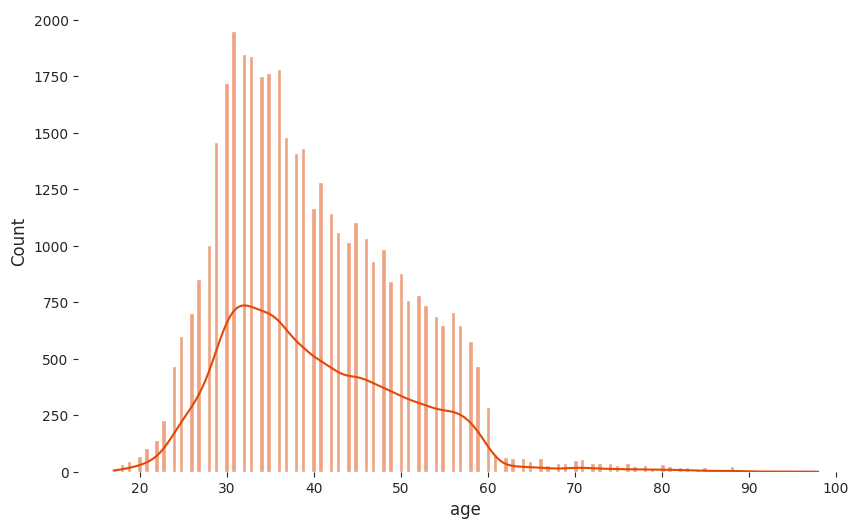

In [ ]:
# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 6))

data = df_bank['age']

num_bins_square_root_rule = int(np.sqrt(len(data)))

ax = sns.histplot(data=data, bins=num_bins_square_root_rule, color='#E14906', kde=True)

# Remove the frame (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Keep the axes (ticks and labels)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

In [ ]:
print(num_bins_square_root_rule)

202


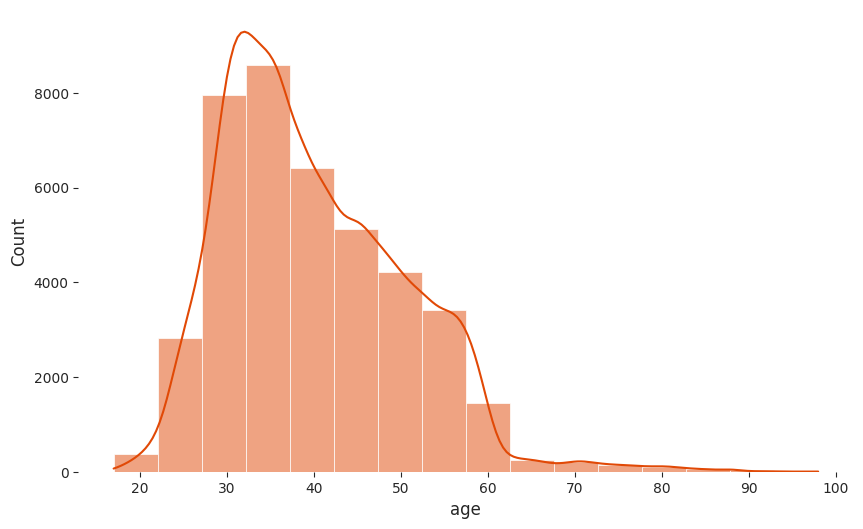

In [ ]:
# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 6))

data = df_bank['age']

num_bins_sturges = int(1 + np.log2(len(data)))

ax = sns.histplot(data=data, bins=num_bins_sturges, color='#E14906', kde=True)

# Remove the frame (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Keep the axes (ticks and labels)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

In [ ]:
print(num_bins_sturges)

16


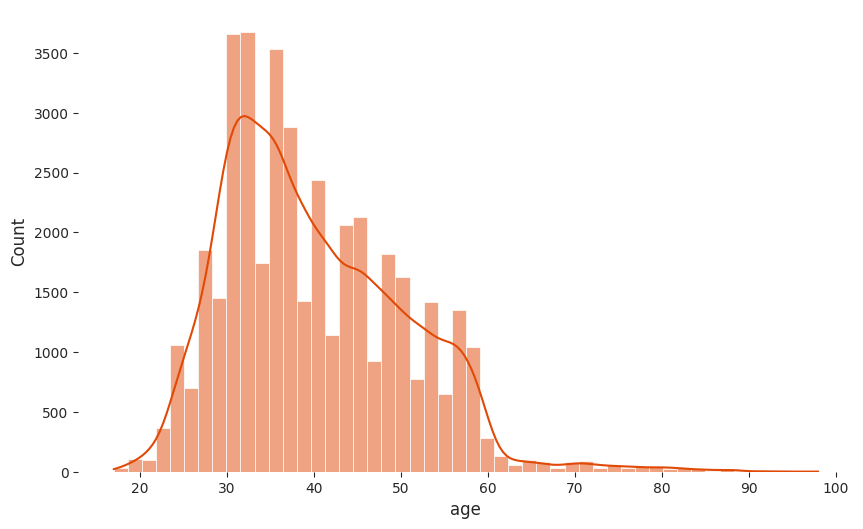

In [ ]:
# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.histplot(data=df_bank, x='age', bins=50, color='#E14906', kde=True)

# Remove the frame (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Keep the axes (ticks and labels)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

In [ ]:
# Get the bin edges
bin_edges = ax.patches
for patch in bin_edges:
    left, right = patch.get_x(), patch.get_x() + patch.get_width()
    print(f"Bin range: [{left:.2f}, {right:.2f})")

Bin range: [17.00, 22.06)
Bin range: [22.06, 27.12)
Bin range: [27.12, 32.19)
Bin range: [32.19, 37.25)
Bin range: [37.25, 42.31)
Bin range: [42.31, 47.38)
Bin range: [47.38, 52.44)
Bin range: [52.44, 57.50)
Bin range: [57.50, 62.56)
Bin range: [62.56, 67.62)
Bin range: [67.62, 72.69)
Bin range: [72.69, 77.75)
Bin range: [77.75, 82.81)
Bin range: [82.81, 87.88)
Bin range: [87.88, 92.94)
Bin range: [92.94, 98.00)


<Axes: xlabel='age', ylabel='Count'>

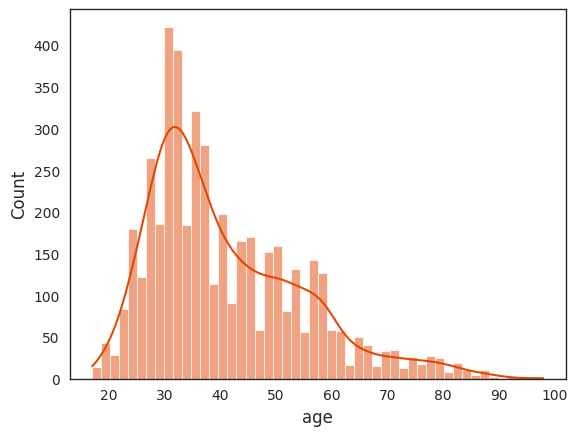

In [ ]:
sns.histplot(data=df_bank_subscribed, x='age', bins=50, color='#E14906', kde=True)

# 5.3.2 Is there a notable difference in term deposit subscription in education?

([<matplotlib.patches.Wedge at 0x7fafd4b88590>,
 [Text(0.4690581102710521, 0.9949796426002643, 'university.degree'),
  Text(-1.0886827904091225, 0.15738418556833153, 'middle.school'),
  Text(-0.3025884122010217, -1.0575633564007714, 'high.school'),
  Text(0.8061157261090913, -0.7484500224594911, 'professional.course'),
  Text(1.0831228325372628, -0.19195033117047908, 'unknown'),
  Text(1.0999959641483947, -0.0029797411370028858, 'illiterate')],
 [Text(0.25584987832966477, 0.5427161686910532, '35.98% (1669)'),
  Text(-0.593826976586794, 0.08584591940090809, '23.47% (1089)'),
  Text(-0.16504822483692091, -0.5768527398549661, '22.22% (1031)'),
  Text(0.43969948696859523, -0.40824546679608603, '12.83% (595)'),
  Text(0.5907942722930524, -0.10470018063844312, '5.41% (251)'),
  Text(0.5999977986263971, -0.0016253133474561194, '0.09% (4)')])

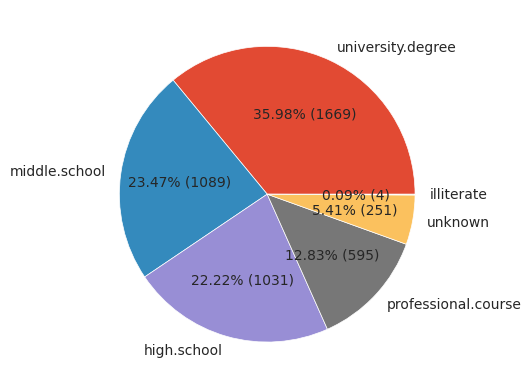

In [ ]:
e = df_bank_subscribed['education'].value_counts()
plt.pie(e,labels = e.index, autopct=autopct_format(e))

([<matplotlib.patches.Wedge at 0x792aaa4ac550>,
 [Text(0.6357070186169, 0.8977062918801519, 'middle.school'),
  Text(-1.0494720979068108, 0.32955775778318036, 'university.degree'),
  Text(-0.2414054579638932, -1.0731837703139397, 'high.school'),
  Text(0.8645703363665921, -0.6800868573020346, 'professional.course'),
  Text(1.0900299223073024, -0.14776592460623716, 'unknown'),
  Text(1.0999989626289848, -0.001510700220995265, 'illiterate')],
 [Text(0.34674928288194545, 0.4896579773891737, '30.39% (12512)'),
  Text(-0.5724393261309877, 0.17975877697264384, '29.54% (12164)'),
  Text(-0.13167570434394174, -0.5853729656257852, '23.10% (9512)'),
  Text(0.4715838198363229, -0.3709564676192916, '12.73% (5240)'),
  Text(0.5945617758039831, -0.08059959523976572, '4.20% (1730)'),
  Text(0.5999994341612643, -0.0008240183023610536, '0.04% (18)')])

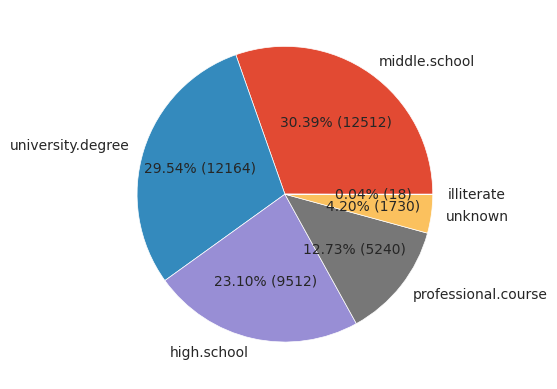

In [ ]:
E = df_bank['education'].value_counts()
plt.pie(E,labels = E.index, autopct=autopct_format(E))

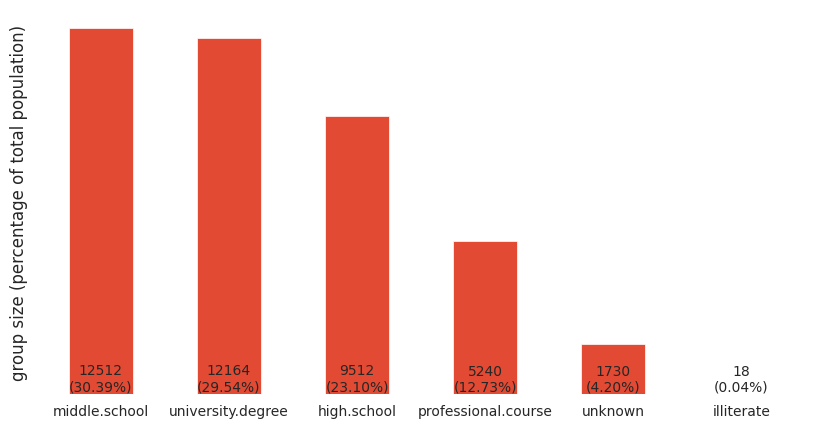

In [ ]:
counts = df_bank['education'].value_counts().tolist()

# Calculate value counts and percentages
percentages = df_bank['education'].value_counts(normalize=True) * 100

# Get x and y data for annotation
x = df_bank['education'].value_counts().index
y = df_bank['education'].value_counts().values

# Calculate value counts and sort
value_counts = df_bank['education'].value_counts().sort_values(ascending=False)
sorted_categories = value_counts.index.tolist()

# Create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data
ax.bar(x,y, width = 0.5)

# Set x-ticks and labels based on sorted categories
ax.set_xticks(range(len(sorted_categories)))
ax.set_xticklabels(sorted_categories)


# Add text annotations
for bar, count, percent in zip(bars, counts, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{count}\n({percent:.2f}%)', ha='center', va='bottom')

# Remove the frame (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove y-axis ticks
ax.yaxis.set_ticks([])

# Set x ticks to be all unique values in 'last_contact_month' column
ax.set_xticks(df_bank['education'].unique())

#plt.xlabel('')
plt.ylabel('group size (percentage of total population)')
plt.show()

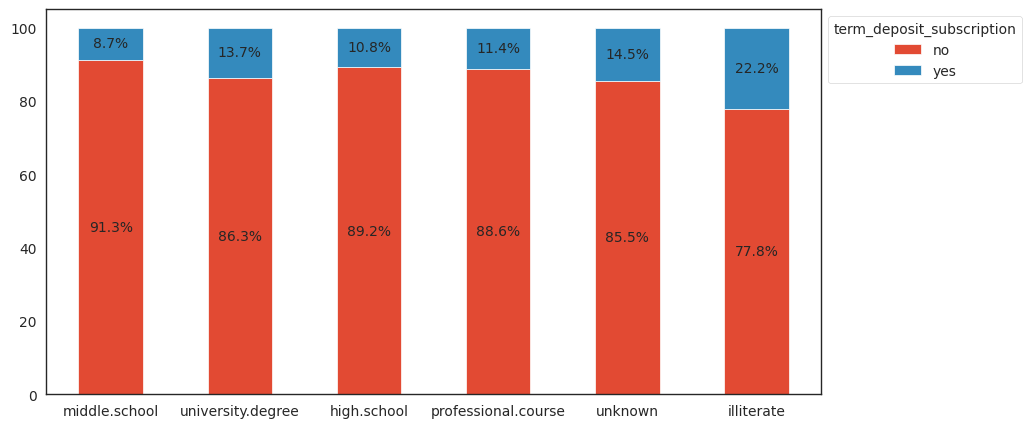

In [ ]:
ct = pd.crosstab(
    df_bank['education'],df_bank['term_deposit_subscription'],
    rownames=['education'], colnames=['term_deposit_subscription']
    )

# Normalize the data to percentages
cross_tab_percentages = ct.div(ct.sum(axis=1), axis=0).mul(100)

# Calculate total counts for each category
total_counts = df_bank['education'].value_counts()

# Order the categories based on total counts
ordered_jobs = total_counts.sort_values(ascending=False).index

# Reindex the crosstab to match the desired order
cross_tab_percentages_ordered = cross_tab_percentages.reindex(ordered_jobs)

ax = cross_tab_percentages_ordered.plot(kind='bar', stacked=True, figsize=(10, 5), rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

ax.legend(title='term_deposit_subscription', loc='best', bbox_to_anchor=(1, 1))

# Remove x-axis label
ax.set_xlabel(None)

# Remove grid lines
plt.grid(False)



*   Other than the groups of illiterate and unknown, the percentages of term deposit subscription vary from 8.7% to 11.4%.
*   The numbers of illiterate and unknown are insignificant, 0.04% and 4.2% respectively.
*   **It is notable that the percentage of term deposit subscription from "university.degree" is 44.6% higher than the percentage of term deposit subscription from "middle.school", while the population of "university.degree" is 2.8% smaller than the population of "middle.school".**
* "middle.school" and "university.degree" are the top 2 regarding group size.   





# 5.3.3 Is there anything eye-catching when we zoom in on marital status?

([<matplotlib.patches.Wedge at 0x792ab0107750>,
 [Text(-0.1570154963225802, 1.088736025818276, 'married'),
  Text(-0.20477298791798956, -1.0807719571765078, 'single'),
  Text(1.037540206755007, -0.3653906394077133, 'divorced'),
  Text(1.0999636766713894, -0.00893923954032092, 'unknown')],
 [Text(-0.08564481617595282, 0.593856014082696, '54.6% (2531)'),
  Text(-0.11169435704617613, -0.5895119766417314, '34.9% (1620)'),
  Text(0.5659310218663673, -0.19930398513147998, '10.3% (476)'),
  Text(0.5999801872753032, -0.0048759488401750465, '0.3% (12)')])

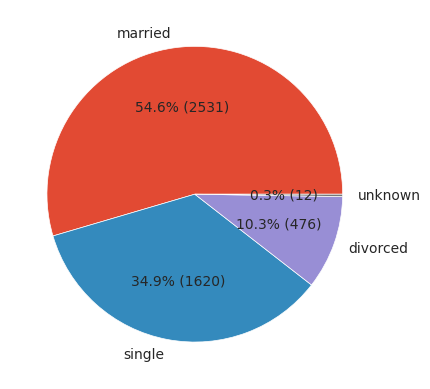

In [ ]:
m = df_bank_subscribed['marital'].value_counts()
plt.pie(m,labels = m.index, autopct=autopct_format(m))

([<matplotlib.patches.Wedge at 0x792ab0e1fe50>,
 [Text(-0.3570650429537865, 1.0404347913734964, 'married'),
  Text(-0.03004178335953481, -1.0995896922273232, 'single'),
  Text(1.0279237853899028, -0.3916282566793326, 'divorced'),
  Text(1.0999795100740595, -0.006713971792647076, 'unknown')],
 [Text(-0.19476275070206536, 0.5675098862037252, '60.5% (24921)'),
  Text(-0.016386427287018987, -0.599776195760358, '28.1% (11564)'),
  Text(0.5606857011217651, -0.2136154127341814, '11.2% (4611)'),
  Text(0.5999888236767597, -0.00366216643235295, '0.2% (80)')])

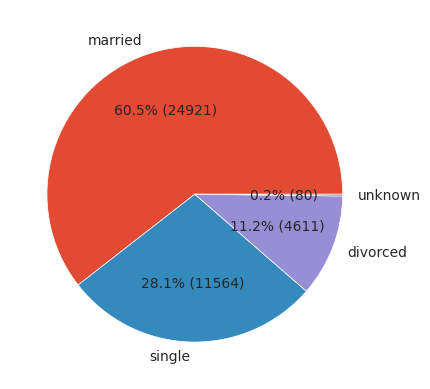

In [ ]:
M = df_bank['marital'].value_counts()
plt.pie(M, labels = M.index, autopct=autopct_format(M))

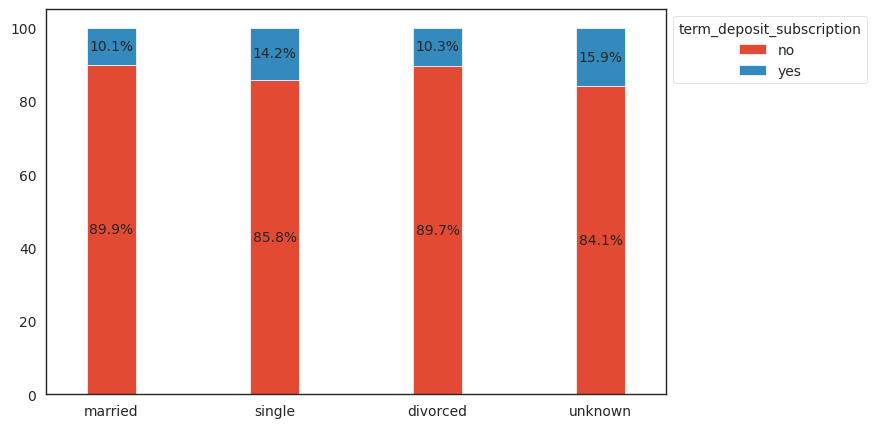

In [ ]:
ct = pd.crosstab(
    df_bank['marital'],df_no_loan['term_deposit_subscription'],
    rownames=['marital'], colnames=['term_deposit_subscription']
    )

# Normalize the data to percentages
cross_tab_percentages = ct.div(ct.sum(axis=1), axis=0).mul(100)

# Calculate total counts for each category
total_counts = df_bank['marital'].value_counts()

# Order the categories based on total counts
ordered_jobs = total_counts.sort_values(ascending=False).index

# Reindex the crosstab to match the desired order
cross_tab_percentages_ordered = cross_tab_percentages.reindex(ordered_jobs)

ax = cross_tab_percentages_ordered.plot(kind='bar', stacked=True, figsize=(8, 5), width=0.3, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

ax.legend(title='term_deposit_subscription', loc='best', bbox_to_anchor=(1, 1))

# Remove x-axis label
ax.set_xlabel(None)

# Remove grid lines
plt.grid(False)



*  **It is notable that the percentage of term deposit subscription from "single" is 33.7% higher than the percentage of term deposit subscription from "married", while the population of "single" is 73.2% smaller than the population of "married".**
*   "married" and "single" combined take 80% of the whole population.



# 5.3.4 What role can default play in term deposit subscription?

([<matplotlib.patches.Wedge at 0x7ecfb6ccded0>,
 [Text(-1.050868318871975, 0.3250781081389352, 'no'),
  Text(1.0508682884359613, -0.32507820652832664, 'unknown')],
 [Text(-0.5732009012028954, 0.17731533171214645, '90.45% (4196)'),
  Text(0.5732008846014334, -0.17731538537908723, '9.55% (443)')])

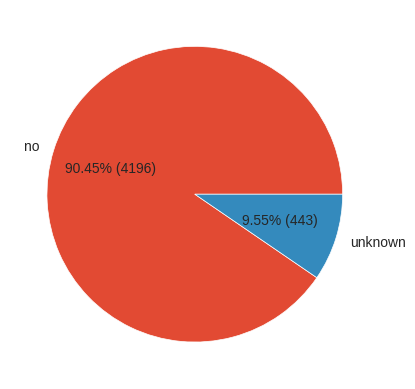

In [ ]:
d = df_bank_subscribed['default'].value_counts()
plt.pie(d, labels = d.index, autopct=autopct_format(d))

([<matplotlib.patches.Wedge at 0x7ecfb733f410>,
 [Text(-0.8716317057385548, 0.6710127938804875, 'no'),
  Text(0.8714781078052098, -0.6712122671824846, 'unknown'),
  Text(1.0999999711949378, -0.00025173624362757543, 'yes')],
 [Text(-0.47543547585739343, 0.3660069784802659, '79.12% (32577)'),
  Text(0.475351695166478, -0.366115782099537, '20.88% (8596)'),
  Text(0.5999999842881477, -0.00013731067834231385, '0.01% (3)')])

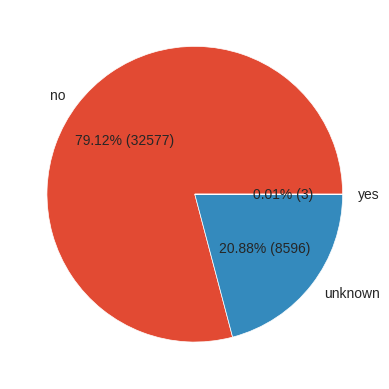

In [ ]:
D = df_bank['default'].value_counts()
plt.pie(D, labels = D.index, autopct=autopct_format(D))

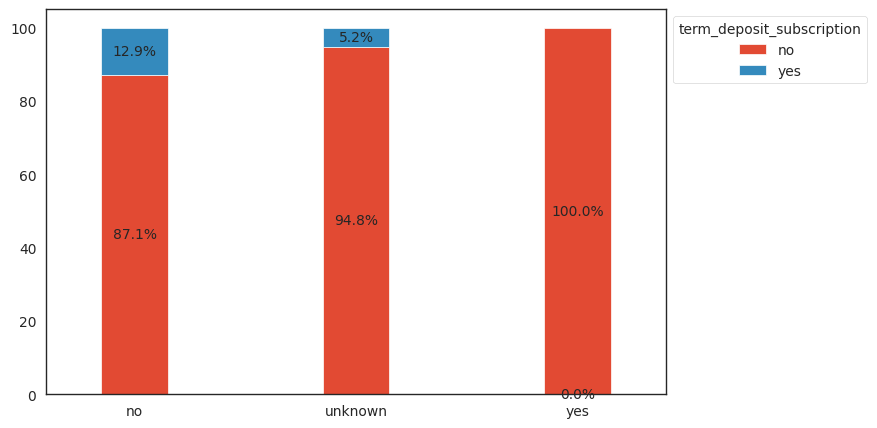

In [ ]:
ct = pd.crosstab(
    df_bank['default'],df_no_loan['term_deposit_subscription'],
    rownames=['default'], colnames=['term_deposit_subscription']
    )

# Normalize the data to percentages
cross_tab_percentages = ct.div(ct.sum(axis=1), axis=0).mul(100)

# Calculate total counts for each category
total_counts = df_bank['default'].value_counts()

# Order the categories based on total counts
ordered_jobs = total_counts.sort_values(ascending=False).index

# Reindex the crosstab to match the desired order
cross_tab_percentages_ordered = cross_tab_percentages.reindex(ordered_jobs)

ax = cross_tab_percentages_ordered.plot(kind='bar', stacked=True, figsize=(8, 5), width=0.3, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

ax.legend(title='term_deposit_subscription', loc='best', bbox_to_anchor=(1, 1))

# Remove x-axis label
ax.set_xlabel(None)

# Remove grid lines
plt.grid(False)

Though almost 80% of the total population did NOT have default, ONLY 12.9% of them subscribed a term deposit. Therefore, **"default" seems not to drive subscription**.

# 5.3.5 Is there anything detectable between housing_loan and term_deposit_subscription?

([<matplotlib.patches.Wedge at 0x7ecfb6621b50>,
 [Text(-0.1393002633846872, 1.0911440952600884, 'yes'),
  Text(0.05993764895092873, -1.0983658216815724, 'no'),
  Text(1.0971133778749365, -0.0796381572353805, 'unknown')],
 [Text(-0.075981961846193, 0.5951695065055027, '54.04% (2507)'),
  Text(0.03269326306414294, -0.5991086300081303, '43.65% (2025)'),
  Text(0.5984254788408744, -0.043438994855662084, '2.31% (107)')])

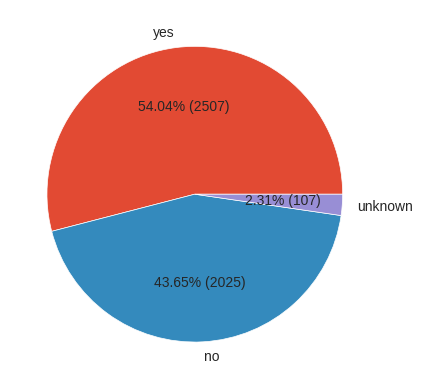

In [ ]:
h = df_bank_subscribed['housing_loan'].value_counts()
plt.pie(h, labels = h.index, autopct=autopct_format(h))

([<matplotlib.patches.Wedge at 0x7ecfb6ad9850>,
 [Text(-0.08242236401391934, 1.0969077235165943, 'yes'),
  Text(-0.0005873487072377029, -1.099999843191578, 'no'),
  Text(1.0968635623072966, -0.08300798565528121, 'unknown')],
 [Text(-0.04495765309850145, 0.5983133037363241, '52.39% (21571)'),
  Text(-0.00032037202212965605, -0.5999999144681334, '45.21% (18615)'),
  Text(0.5982892158039799, -0.045277083084698834, '2.40% (990)')])

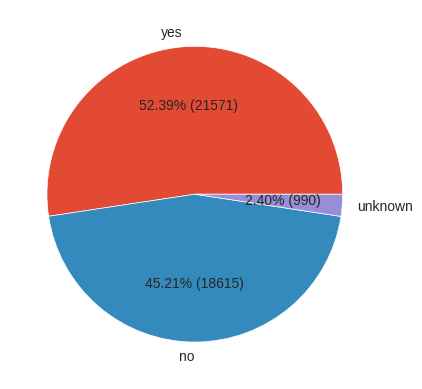

In [ ]:
H = df_bank['housing_loan'].value_counts()
plt.pie(H, labels = H.index, autopct=autopct_format(H))

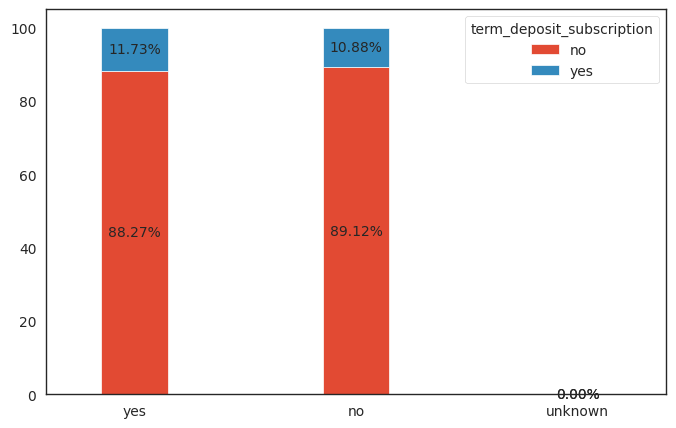

In [ ]:
ct = pd.crosstab(
    df_bank['housing_loan'],df_no_loan['term_deposit_subscription'],
    rownames=['housing_loan'], colnames=['term_deposit_subscription']
    )

# Normalize the data to percentages
cross_tab_percentages = ct.div(ct.sum(axis=1), axis=0).mul(100)

# Calculate total counts for each category
total_counts = df_bank['housing_loan'].value_counts()

# Order the categories based on total counts
ordered_jobs = total_counts.sort_values(ascending=False).index

# Reindex the crosstab to match the desired order
cross_tab_percentages_ordered = cross_tab_percentages.reindex(ordered_jobs)

ax = cross_tab_percentages_ordered.plot(kind='bar', stacked=True, figsize=(8, 5), width=0.3, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.2f}%', ha='center', va='center')

ax.legend(title='term_deposit_subscription', loc='best', bbox_to_anchor=(1, 1))

# Remove x-axis label
ax.set_xlabel(None)

# Remove grid lines
plt.grid(False)

*   Having and NOT having housing loan are almost half and half in population.
*   **It's interesting that the portion of term deposit subscription in both groups are close, both around 11%.** It is expected there should be more subscriptions from the group of NOT having housing loan.



# 5.3.6 Is there anything detectable between personal_loan and term_deposit_subscription?

([<matplotlib.patches.Wedge at 0x7ecfb60cb050>,
 [Text(-0.9462963573017458, 0.5608236836630982, 'no'),
  Text(0.9032103563237646, -0.6278622876312117, 'yes'),
  Text(1.0971133778749365, -0.0796381572353805, 'unknown')],
 [Text(-0.5161616494373158, 0.305903827452599, '82.97% (3849)'),
  Text(0.49266019435841696, -0.3424703387079336, '14.72% (683)'),
  Text(0.5984254788408744, -0.043438994855662084, '2.31% (107)')])

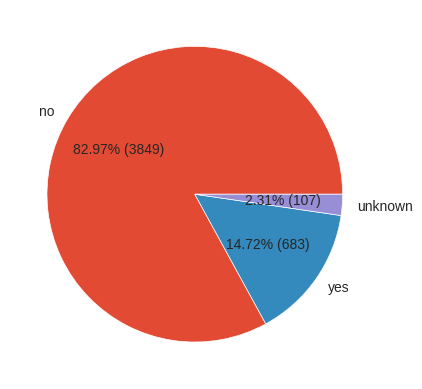

In [ ]:
p = df_bank_subscribed['personal_loan'].value_counts()
plt.pie(p, labels = p.index, autopct=autopct_format(p))

([<matplotlib.patches.Wedge at 0x7ecfb61a0190>,
 [Text(-0.9364893077059764, 0.5770509306399055, 'no'),
  Text(0.8902736860131528, -0.6460748903900804, 'yes'),
  Text(1.0968635467637404, -0.0830081910468362, 'unknown')],
 [Text(-0.5108123496578053, 0.3147550530763121, '82.42% (33938)'),
  Text(0.48560382873444696, -0.3524044856673165, '15.17% (6248)'),
  Text(0.5982892073256765, -0.04527719511645611, '2.40% (990)')])

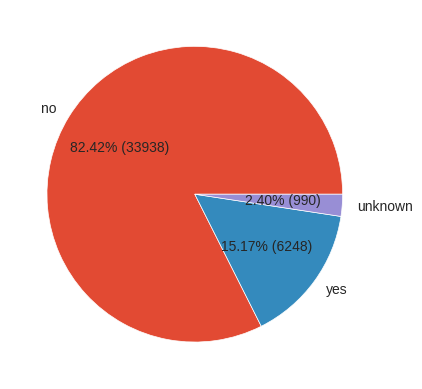

In [ ]:
P = df_bank['personal_loan'].value_counts()
plt.pie(P, labels = P.index, autopct=autopct_format(P))

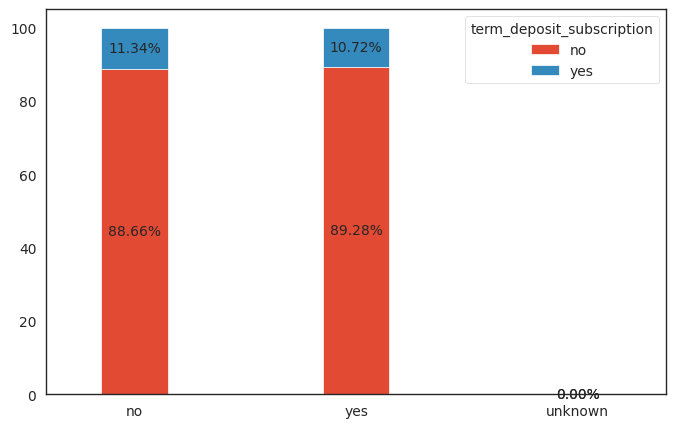

In [ ]:
ct = pd.crosstab(
    df_bank['personal_loan'],df_no_loan['term_deposit_subscription'],
    rownames=['personal_loan'], colnames=['term_deposit_subscription']
    )

# Normalize the data to percentages
cross_tab_percentages = ct.div(ct.sum(axis=1), axis=0).mul(100)

# Calculate total counts for each category
total_counts = df_bank['personal_loan'].value_counts()

# Order the categories based on total counts
ordered_jobs = total_counts.sort_values(ascending=False).index

# Reindex the crosstab to match the desired order
cross_tab_percentages_ordered = cross_tab_percentages.reindex(ordered_jobs)

ax = cross_tab_percentages_ordered.plot(kind='bar', stacked=True, figsize=(8, 5), width=0.3, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.2f}%', ha='center', va='center')

ax.legend(title='term_deposit_subscription', loc='best', bbox_to_anchor=(1, 1))

# Remove x-axis label
ax.set_xlabel(None)

# Remove grid lines
plt.grid(False)



*   The ratio between NOT having and having personal loan is about 8:2.
*   **Despite the huge gap, the percentages of term_deposit_subscription from these two groups are close, around 11%.** It is anticipated that people without personal loan are inclined to subscribe a term depsoit.



# 5.3.7 Is there any pattern in subscribers' occupation?

In [ ]:
# A tree map works well to get percentage and number of a category when there are too many categories for a pie chart.
# BUT this approach demands some unique libraries and tree maps are NOT in high demand in this case.
# Thus, this approach is NOT cost effective.
x = 0
y = 0
width = 100
height = 100

job_names = df_bank['job'].value_counts().index
values = df_bank['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)',
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = job_names[counter]+'<br>'+str(values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    mode='text',
)


layout = dict(
    #title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700,
    width=700,
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

pio.show(figure)

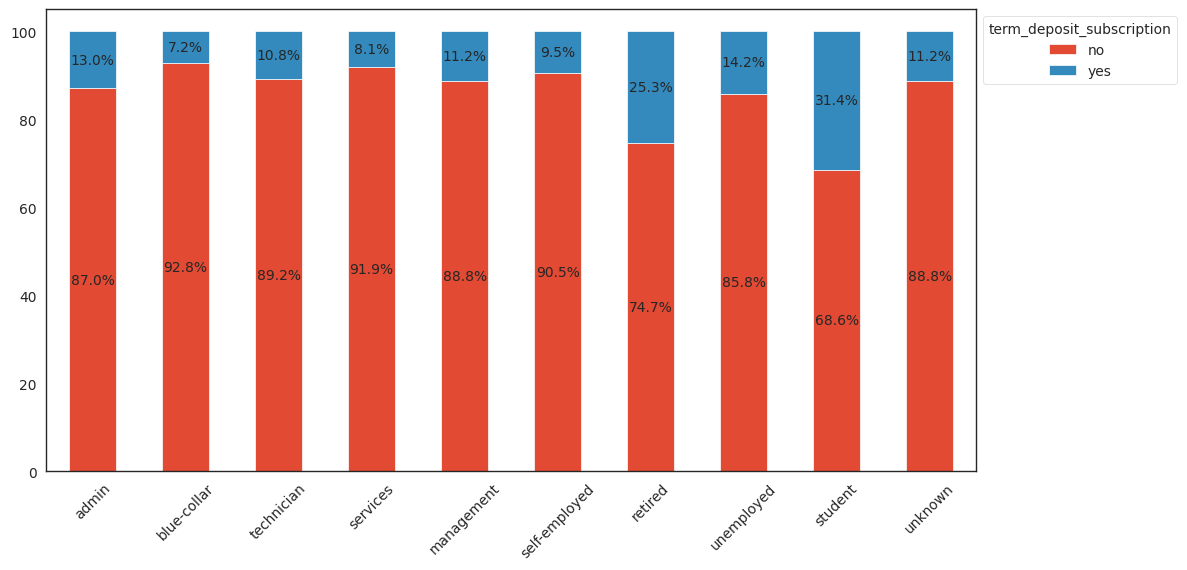

In [ ]:
ct = pd.crosstab(
    df_bank['job'],df_bank['term_deposit_subscription'],
    rownames=['job'], colnames=['term_deposit_subscription']
    )

# Normalize the data to percentages
cross_tab_percentages = ct.div(ct.sum(axis=1), axis=0).mul(100)

# Calculate total counts for each category
total_counts = df_bank['job'].value_counts()

# Order the categories based on total counts
ordered_jobs = total_counts.sort_values(ascending=False).index

# Reindex the crosstab to match the desired order
cross_tab_percentages_ordered = cross_tab_percentages.reindex(ordered_jobs)

ax = cross_tab_percentages_ordered.plot(kind='bar', stacked=True, figsize=(12, 6), rot=45)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

ax.legend(title='term_deposit_subscription', loc='best', bbox_to_anchor=(1, 1))

# Remove x-axis label
ax.set_xlabel(None)

# Remove grid lines
plt.grid(False)

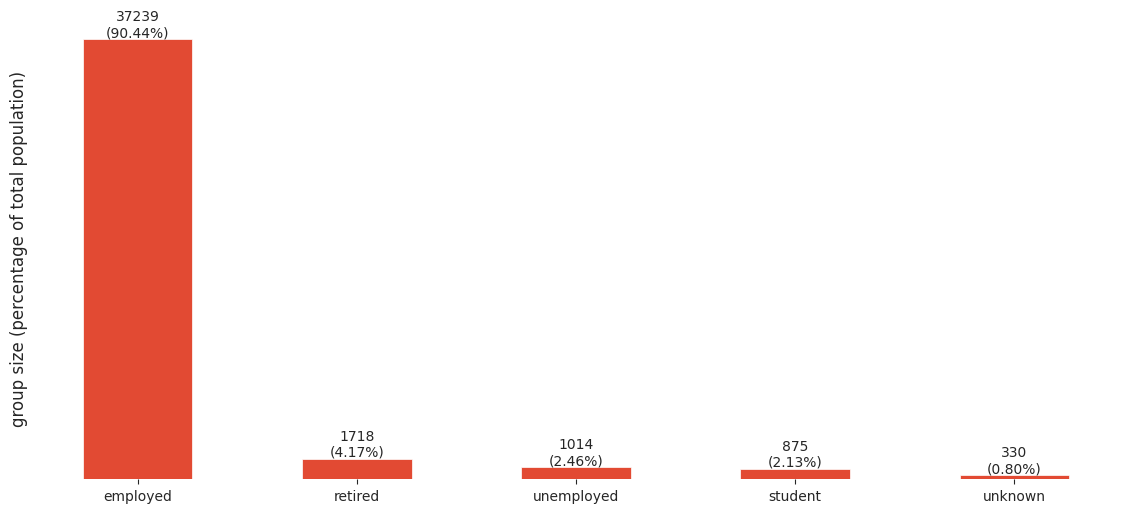

In [ ]:
counts = df_bank['employment'].value_counts().tolist()

# Calculate value counts and percentages
percentages = df_bank['employment'].value_counts(normalize=True) * 100

# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(14, 6))

# Create the bar chart on the axes
bars = ax.bar(percentages.index, percentages.values, width = 0.5)

# Rotate x-axis tick labels
plt.xticks(rotation=0)

# Add text annotations
for bar, count, percent in zip(bars, counts, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{count}\n({percent:.2f}%)',
            ha='center', va='bottom')

# Remove the frame (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Keep the axes (ticks and labels)
ax.xaxis.set_ticks_position('bottom')

# Remove y-axis ticks
ax.yaxis.set_ticks([])

#plt.xlabel('')
plt.ylabel('group size (percentage of total population)')
plt.show()

*   The percentages of term_deposit_subscription among people with a job are relatively close, ranging from 7.2% to 13.0%.
*   **"retired" and "student" have high conversion rates, 25.3% and 31.4%** although they take up a remarkably small part of the total population, 4.17% and 2.13%.





# 5.3.8 Did contact timing have something to do with the term deposit subscription?

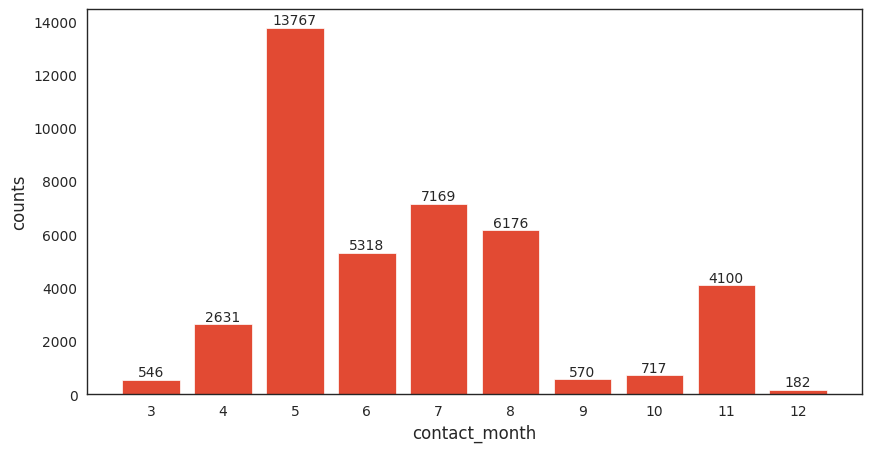

In [ ]:
# Get x and y data for annotation
x = df_bank['contact_month'].value_counts().index
y = df_bank['contact_month'].value_counts().values

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x,y)

for i, j in zip(x, y):
    plt.text(i, j, str(j), ha='center', va='bottom')

# Set x ticks to be all unique values in 'last_contact_month' column
ax.set_xticks(df_bank['contact_month'].unique())

plt.xlabel('contact_month')
plt.ylabel('counts')
plt.show()

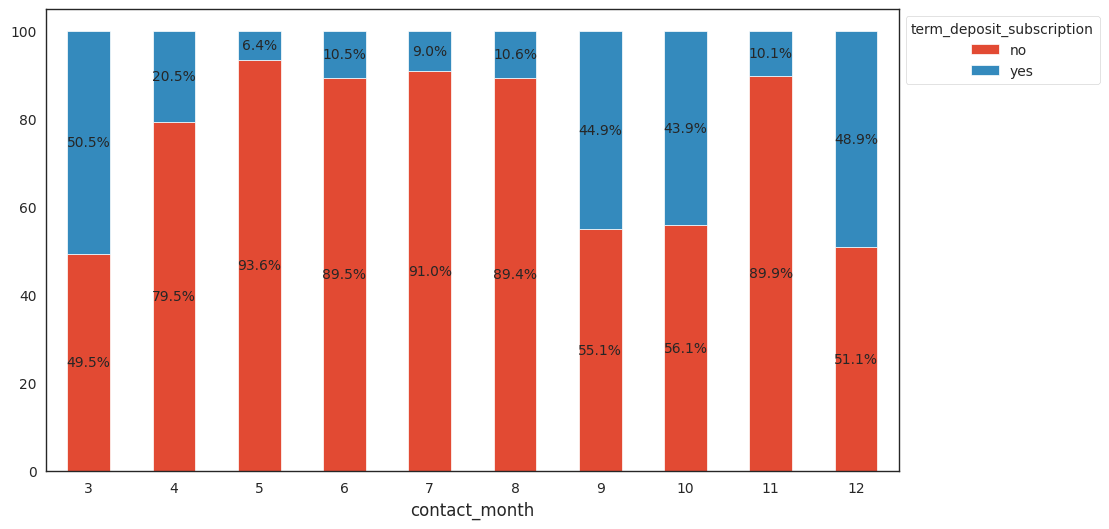

In [ ]:
ct = pd.crosstab(
    df_bank['contact_month'],df_bank['term_deposit_subscription'],
    rownames=['contact_month'], colnames=['term_deposit_subscription']
    )

# Normalize the data to percentages
cross_tab_percentages = ct.div(ct.sum(axis=1), axis=0).mul(100)

ax = cross_tab_percentages.plot(kind='bar', stacked=True, figsize=(11, 6), rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

ax.legend(title='term_deposit_subscription', loc='best', bbox_to_anchor=(1, 1))

# Remove grid lines
plt.grid(False)



*   The number of calls is the biggest in May, followed by July and August.
*   The percentage of term_deposit_subscription is lowest in May, followed by July and June. And the percentage in August is 0.1% higher the number in June.
*   The months with higher term_deposit_subscription are all with small numbers of calls, such as March, December and September.





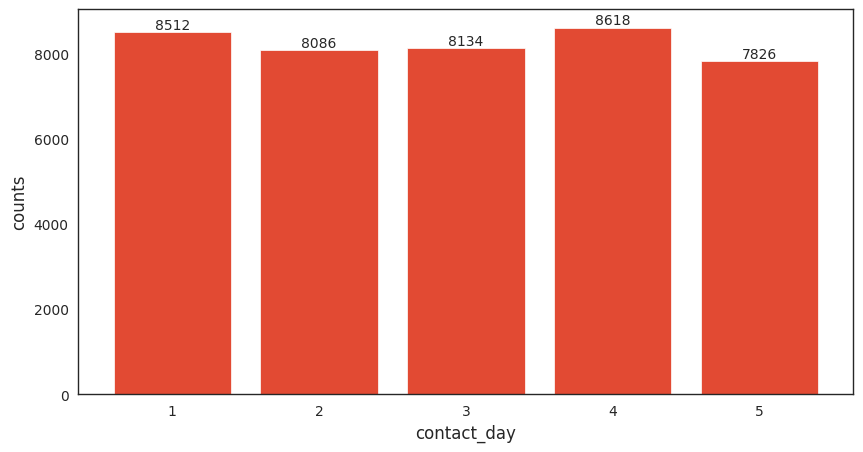

In [ ]:
# Get x and y data for annotation
x = df_bank['contact_day'].value_counts().index
y = df_bank['contact_day'].value_counts().values

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x,y)

for i, j in zip(x, y):
    plt.text(i, j, str(j), ha='center', va='bottom')

# Set x ticks to be all unique values in 'last_contact_month' column
ax.set_xticks(df_bank['contact_day'].unique())

plt.xlabel('contact_day')
plt.ylabel('counts')
plt.show()

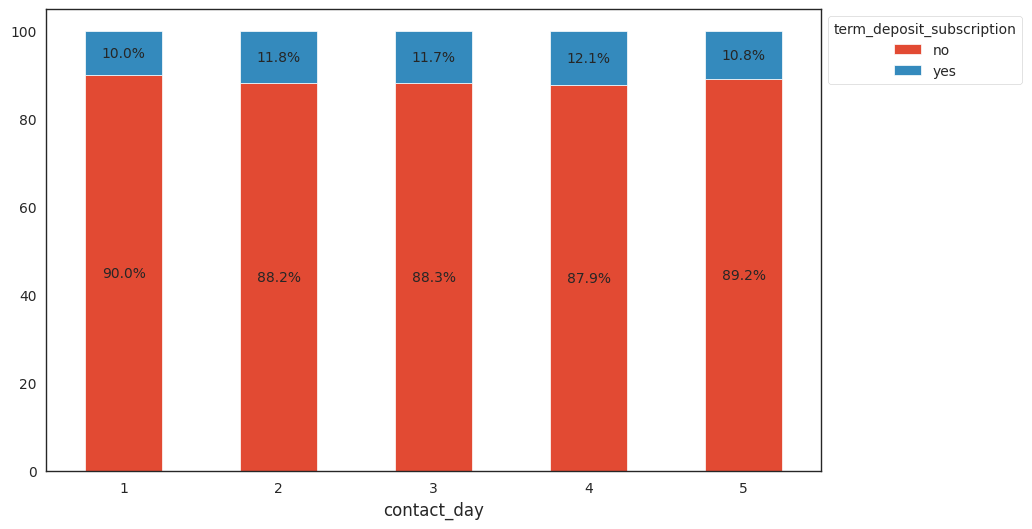

In [ ]:
ct = pd.crosstab(
    df_bank['contact_day'],df_bank['term_deposit_subscription'],
    rownames=['contact_day'], colnames=['term_deposit_subscription']
    )

# Normalize the data to percentages
cross_tab_percentages = ct.div(ct.sum(axis=1), axis=0).mul(100)

ax = cross_tab_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

ax.legend(title='term_deposit_subscription', loc='best', bbox_to_anchor=(1, 1))

# Remove grid lines
plt.grid(False)

* In general, the number of calls made on each day is similar.  
* In general, the majority did NOT subscribe a term deposit no matter which day the call was made.





*   The answer to the question on the relationship between contact timing and term deposit subscription is "**It could be. Seasonality is seen since calls made from May to August takes almost 80%.**"
*   However, the conversion rates in these 4 months are much lower then the numbers in the 4 moths with small numbers of calls.





---

# 5.4 What is the correlation among variables?

# 5.4.1 Encode values for correlation and feature engineering

In [ ]:
# drop the newly created columns
df_bank.drop(['employment', 'last_contact_in_minute'],axis=1, inplace=True)

Label Encoding

In [ ]:
dictionary_YNU={'yes':1,'no':0,'unknown':-1}
df_bank['default']=df_bank['default'].map(dictionary_YNU)
df_bank['housing_loan']=df_bank['housing_loan'].map(dictionary_YNU)
df_bank['personal_loan']=df_bank['personal_loan'].map(dictionary_YNU)

In [ ]:
dictionary_SFN={'success':1,'failure':0,'nonexistent':-1}
df_bank['previous_outcome']=df_bank['previous_outcome'].map(dictionary_SFN)

In [ ]:
dictionary_YN={'yes':1,'no':0}
df_bank['term_deposit_subscription']=df_bank['term_deposit_subscription'].map(dictionary_YN)

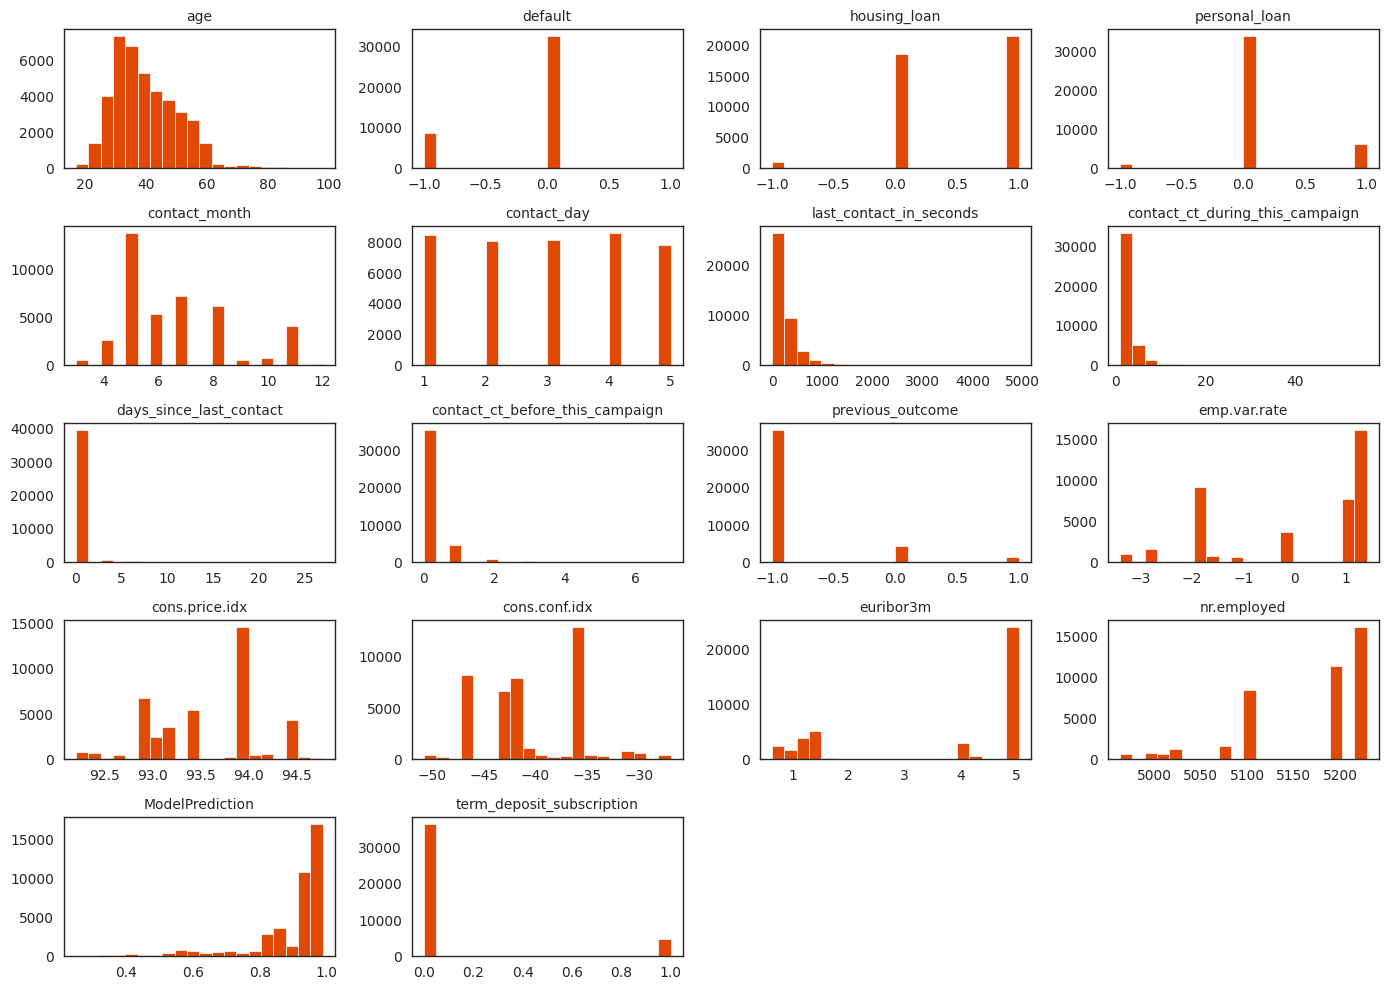

In [ ]:
axes = df_bank.hist(bins=20, figsize=(14,10), color='#E14906', grid=False)

# Iterate through each subplot (histogram) and set the title size
for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=10)

plt.tight_layout() # Adjust layout to prevent titles from overlapping

plt.show()

*   The dataset we are working on is **imbalanced** as there are so many more 0/No than 1/Yes from targeted variable, "term_deposit_subscription".
*   Imbalanced dataset is a dataset where the classes are not balanced or equal. This means there are an unequal number of samples from each target class and some classes may have significantly more samples than others.



One Hot Encoding

In [ ]:
dummy_contact=pd.get_dummies(df_bank['contact_device_type'], prefix='dummy',drop_first=True)
df_bank = pd.concat([df_bank,dummy_contact],axis=1)
df_bank.drop(['contact_device_type'],axis=1, inplace=True)

Frequency Encoding

In [ ]:
bank_job=df_bank['job'].value_counts().to_dict()
bank_edu=df_bank['education'].value_counts().to_dict()
bank_mari=df_bank['marital'].value_counts().to_dict()

In [ ]:
df_bank['job']=df_bank['job'].map(bank_job)
df_bank['education']=df_bank['education'].map(bank_edu)
df_bank['marital']=df_bank['marital'].map(bank_mari)

# 5.4.2 Find pairwise correlation of ALL columns.

Questions for debugging or performance improving on correlation:


*   What's the difference among the three methods, pearson, kendall or spearman?
*    Which method is best in this case, pearson, kendall or spearman?



In [ ]:
# Define a colormap
custom_blue = LinearSegmentedColormap.from_list('custom blue', ['#ffff00','#002266'], N=256)
custom_blue = custom_blue.reversed()

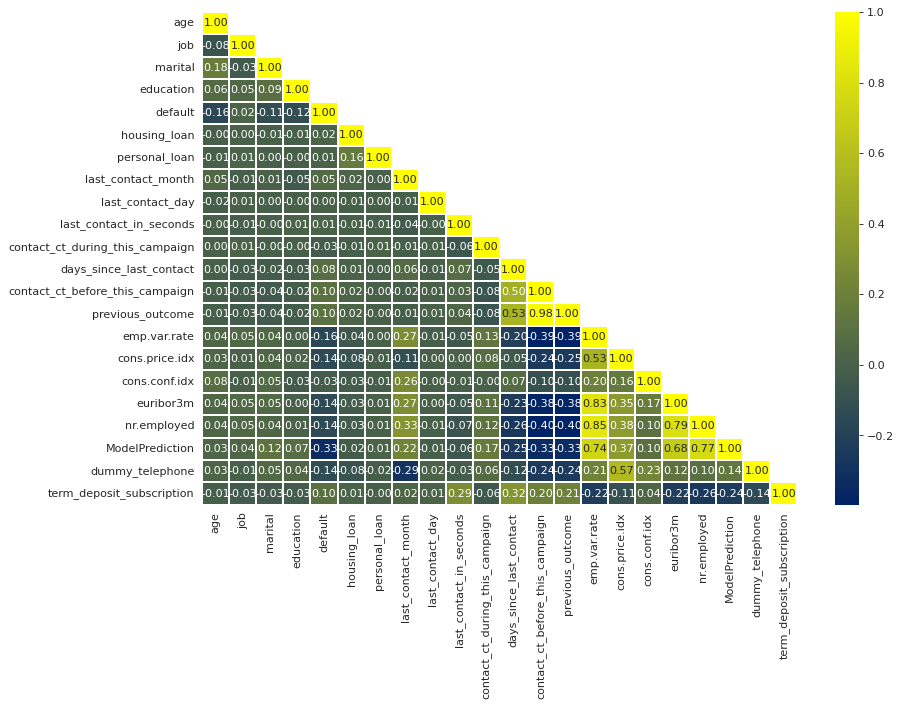

In [ ]:
# Calculation of the Spearman correlation
target = 'term_deposit_subscription'
df_ordered = pd.concat([df_bank.drop(target,axis=1), df_bank[target]],axis=1)
corr = df_ordered.corr(method='kendall')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=custom_blue, fmt='.2f', linewidths=0.2)
plt.show()

In [ ]:
# Define a colormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

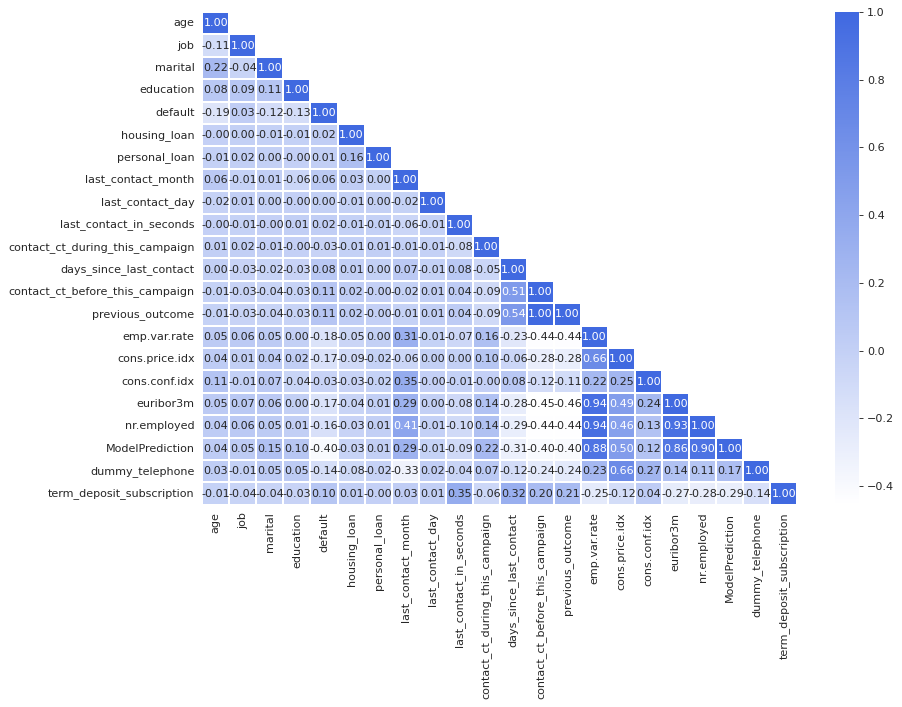

In [ ]:
# Calculation of the Spearman correlation
target = 'term_deposit_subscription'
df_ordered = pd.concat([df_bank.drop(target,axis=1), df_bank[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

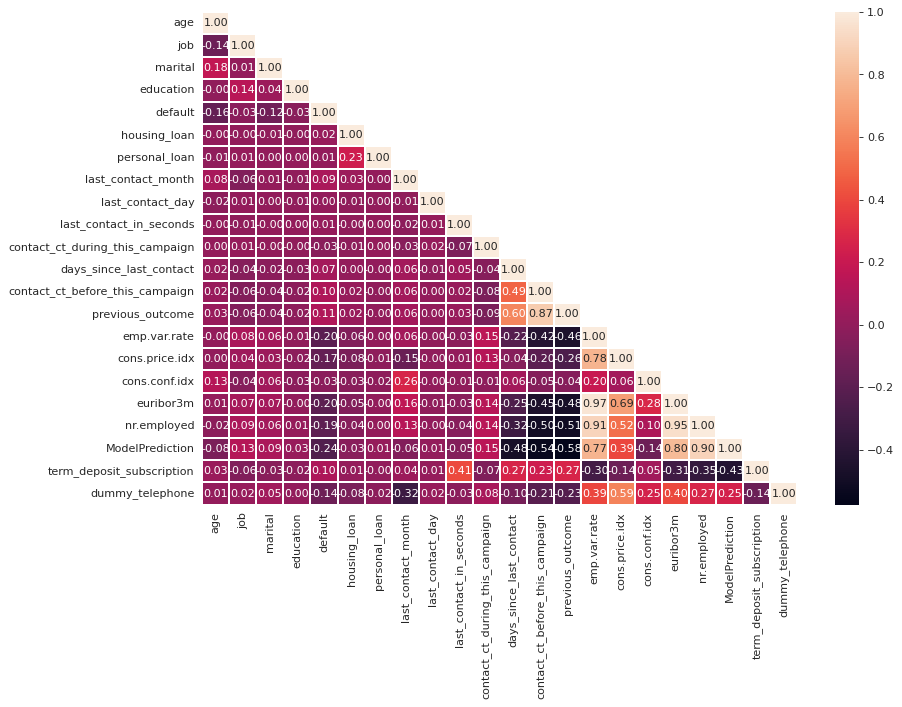

In [ ]:
# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
# The default method for the corr() function in pandas is Pearson's correlation coefficient.
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(df_bank.corr(), mask=mask, annot=True, fmt='.2f', linewidths=0.2)
plt.show()

# 5.4.3 Identify the correlation between target variable and all other variables.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_bank.corr()

# Extract the correlation values between the target variable and other variables
target_correlation = correlation_matrix['term_deposit_subscription'].drop('term_deposit_subscription') #Exclude target variable itself

# Print the correlation values
print(target_correlation)

age                                0.030381
job                               -0.059710
marital                           -0.033817
education                         -0.016477
default                            0.099210
housing_loan                       0.011436
personal_loan                     -0.003151
last_contact_month                 0.037210
last_contact_day                   0.009993
last_contact_in_seconds            0.405297
contact_ct_during_this_campaign   -0.066361
days_since_last_contact            0.267115
contact_ct_before_this_campaign    0.230202
previous_outcome                   0.270399
emp.var.rate                      -0.298289
cons.price.idx                    -0.136134
cons.conf.idx                      0.054802
euribor3m                         -0.307740
nr.employed                       -0.354669
ModelPrediction                   -0.430892
dummy_telephone                   -0.144774
Name: term_deposit_subscription, dtype: float64


<Axes: >

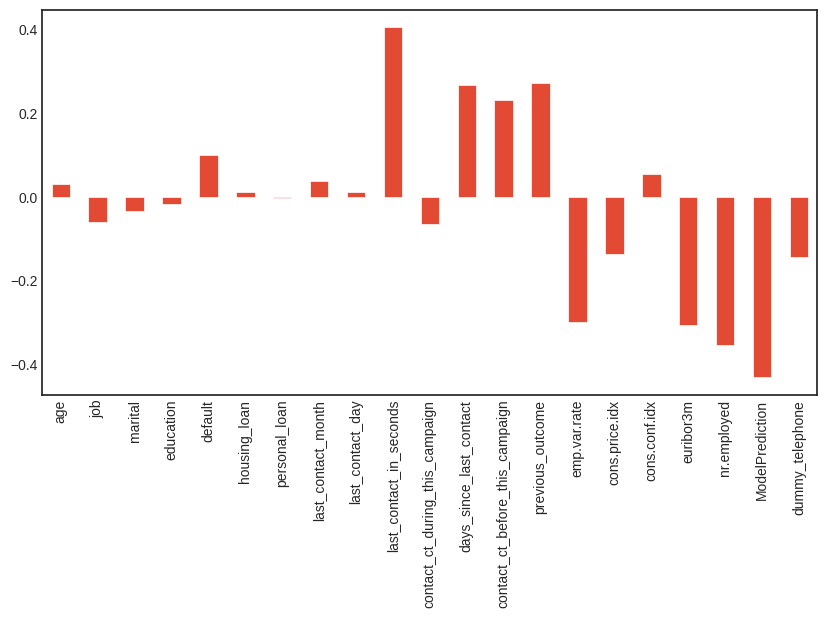

In [ ]:
plt.style.use('seaborn-v0_8-white')
target_correlation.plot(kind='bar',figsize=(10,5))

# 6.featuring engineering for machine learning

Text(0.5, 1.0, 'no_of_employees_quarterly')

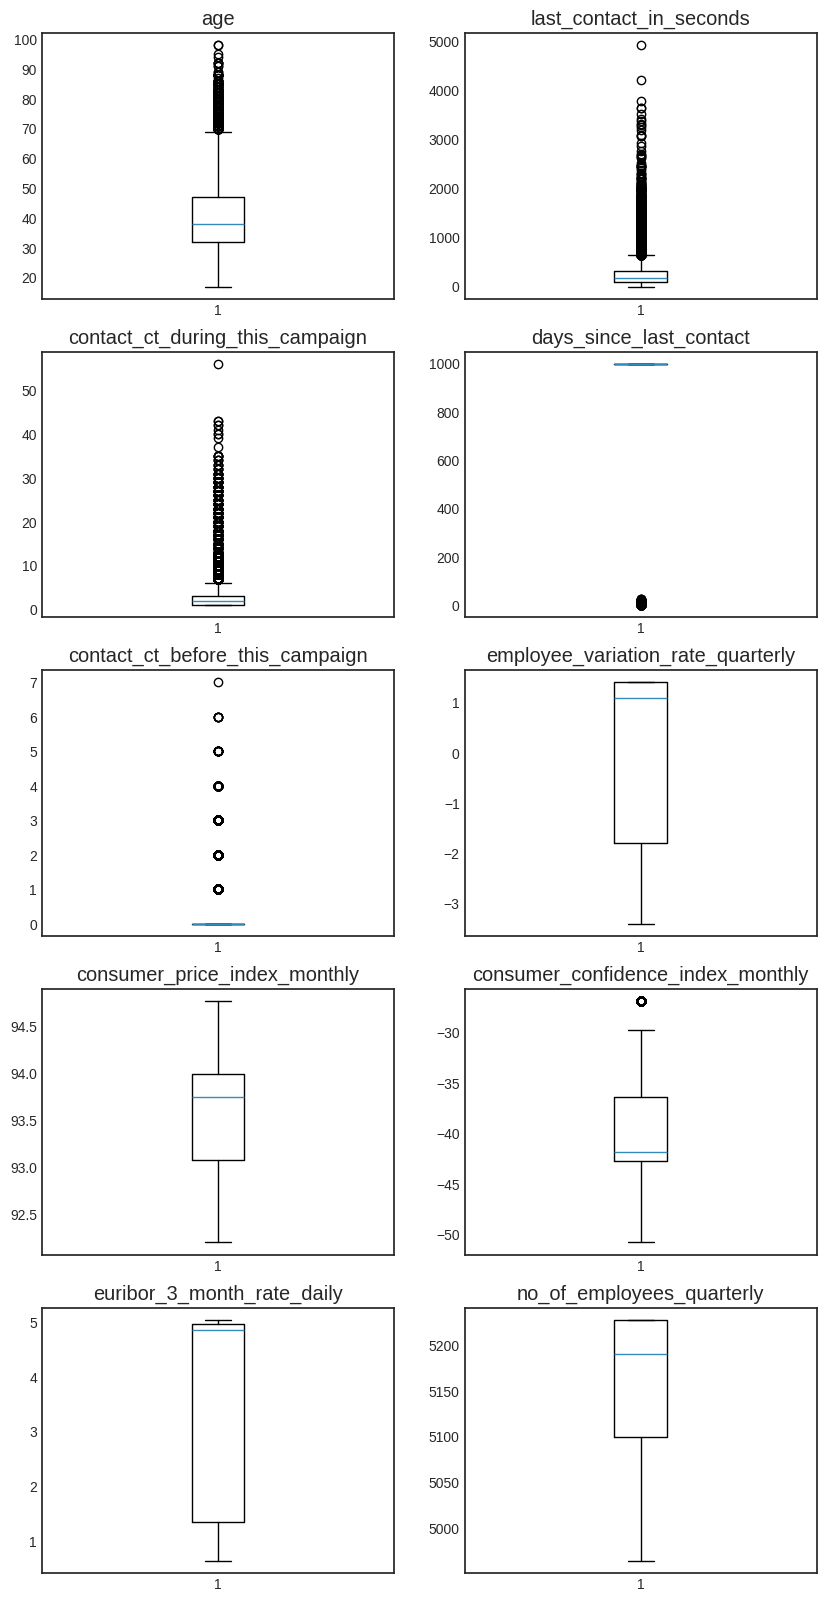

In [ ]:
plt.figure(figsize = (10, 20))
plt.style.use('seaborn-v0_8-white')
ax=plt.subplot(521)
plt.boxplot(df_bank['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df_bank['last_contact_in_seconds'])
ax.set_title('last_contact_in_seconds')
ax=plt.subplot(523)
plt.boxplot(df_bank['contact_ct_during_this_campaign'])
ax.set_title('contact_ct_during_this_campaign')
ax=plt.subplot(524)
plt.boxplot(df_bank['days_since_last_contact'])
ax.set_title('days_since_last_contact')
ax=plt.subplot(525)
plt.boxplot(df_bank['contact_ct_before_this_campaign'])
ax.set_title('contact_ct_before_this_campaign')
ax=plt.subplot(526)
plt.boxplot(df_bank['emp.var.rate'])
ax.set_title('employee_variation_rate_quarterly')
ax=plt.subplot(527)
plt.boxplot(df_bank['cons.price.idx'])
ax.set_title('consumer_price_index_monthly')
ax=plt.subplot(528)
plt.boxplot(df_bank['cons.conf.idx'])
ax.set_title('consumer_confidence_index_monthly')
ax=plt.subplot(529)
plt.boxplot(df_bank['euribor3m'])
ax.set_title('euribor_3_month_rate_daily')
ax=plt.subplot(5,2,10)
plt.boxplot(df_bank['nr.employed'])
ax.set_title('no_of_employees_quarterly')

Many features doesn't have much outliers except for age,duration and campaign. Fix those features using IQR method. There are other ways and may be better ways to handle these outliers. However, given time constraint, I use IQR method this time for no learning curve and easy interpretation.

In [ ]:
numerical_features=['age','contact_ct_during_this_campaign','last_contact_in_seconds']
for cols in numerical_features:
    Q1 = df_bank[cols].quantile(0.25)
    Q3 = df_bank[cols].quantile(0.75)
    IQR = Q3 - Q1

    filtered = (df_bank[cols] >= Q1 - 1.5 * IQR) & (df_bank[cols] <= Q3 + 1.5 *IQR)
    df_bank=df_bank.loc[filtered]

In [ ]:
#plt.figure(figsize = (10, 20))
#plt.style.use('seaborn-v0_8-white')
#ax=plt.subplot(521)
#plt.boxplot(df_bank['age'])
#ax.set_title('age')
#ax=plt.subplot(522)
#plt.boxplot(df_bank['last_contact_in_seconds'])
#ax.set_title('last_contact_in_seconds')
#ax=plt.subplot(523)
#plt.boxplot(df_bank['contact_ct_during_this_campaign'])
#ax.set_title('contact_ct_during_this_campaign')

Problems with Imbalanced Datasets:

*   Imbalanced datasets can lead to algorithms that are biased towards the majority
class. This means that any classification algorithm trained on an imbalanced dataset will often inaccurately classify minority classes as the majority class.
*   The performance of a machine learning model can become highly skewed when it is fed with imbalanced data. For example, our dataset has 91.2% class 0 and 8.8% class 1, then the learning model could be easily optimized to just predict all test input as belonging to class 0 and still get 91.2% accuracy!
*   If a model is trained on data which is heavily imbalanced, it can develop an incorrect understanding of the underlying trends in the data. The model may not be able to recognize how certain values are distributed among different classes or even how certain classes overlap with each other.








Techniques to Handle Imbalanced Dataset:

Standardization

In [ ]:
bank_scale=df_bank.copy()
Categorical_variables=['job', 'education', 'marital', 'default', 'housing_loan',
                       'personal_loan', 'previous_outcome', 'last_contact_month',
                       'last_contact_day','term_deposit_subscription', 'dummy_telephone']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [ ]:
scaled_data = pd.concat([bank_scale[[
    'job', 'education', 'marital', 'default', 'housing_loan', 'personal_loan',
    'previous_outcome', 'last_contact_month', 'last_contact_day','term_deposit_subscription', 'dummy_telephone'
       ]].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,marital,default,housing_loan,personal_loan,previous_outcome,last_contact_month,last_contact_day,term_deposit_subscription,...,last_contact_in_seconds,contact_ct_during_this_campaign,days_since_last_contact,contact_ct_before_this_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
0,8976,10687,21499,0,0,0,-1,5,2,0,...,0.383301,-0.81312,-0.161027,-0.354707,0.660585,0.741184,0.891953,0.720755,0.340065,0.366294
1,3454,8284,21499,-1,0,0,-1,5,2,0,...,-0.413667,-0.81312,-0.161027,-0.354707,0.660585,0.741184,0.891953,0.720755,0.340065,0.536804
2,3454,8284,21499,0,1,0,-1,5,2,0,...,0.134248,-0.81312,-0.161027,-0.354707,0.660585,0.741184,0.891953,0.720755,0.340065,0.472500
3,9107,10687,21499,0,0,0,-1,5,2,0,...,-0.399435,-0.81312,-0.161027,-0.354707,0.660585,0.741184,0.891953,0.720755,0.340065,0.375498
4,3454,8284,21499,0,0,1,-1,5,2,0,...,0.710627,-0.81312,-0.161027,-0.354707,0.660585,0.741184,0.891953,0.720755,0.340065,0.433796


Feature Selection

In [ ]:
X=scaled_data.drop(['term_deposit_subscription'],axis=1)
y=scaled_data.term_deposit_subscription

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

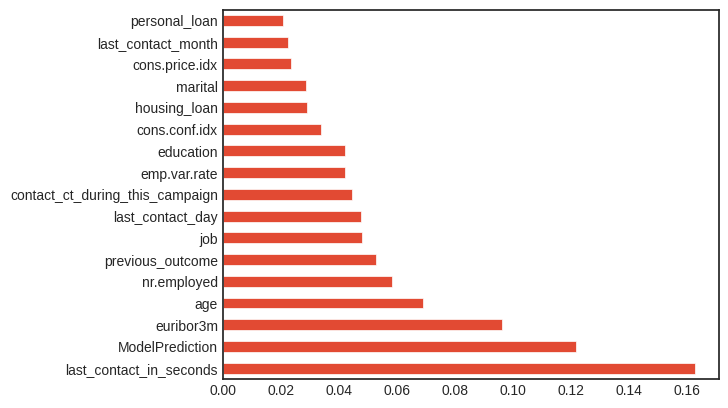

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

Train and Test Split (80:20)

In [ ]:
X=scaled_data.drop(['days_since_last_contact','last_contact_day','cons.price.idx','personal_loan','housing_loan','emp.var.rate', 'ModelPrediction', 'term_deposit_subscription'],axis=1)
y=scaled_data.term_deposit_subscription

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28440, 14)
Input Test: (7110, 14)
Output Training: (28440,)
Output Test: (7110,)


Model Selection

In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8819127988748241
Decision Tree Test Accuracy: 0.6713642756680731
KNN Test Accuracy: 0.8593248945147678
SVC Test Accuracy: 0.91887482419128
Naive Bayes Test Accuracy: 0.8168776371308016


Logistic regression with Hyperparameter tuning

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=0.5689866029018293, random_state=0)
The mean accuracy of the model is: 0.9286919831223629


In [ ]:
logreg = LogisticRegression(C=0.5689866029018293, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[6394  127]
 [ 380  209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6521
           1       0.62      0.35      0.45       589

    accuracy                           0.93      7110
   macro avg       0.78      0.67      0.71      7110
weighted avg       0.92      0.93      0.92      7110



Insights:

The Confusion matrix result is telling us that we have 6394+209 correct predictions and 380+127 incorrect predictions.
The Classification report reveals that we have 94% precision which means the accuracy that the model classifier not to label an instance positive that is actually negative which is important as we shouldn't label a lead as positive in making a term deposit when he/she isn't interested in making a deposit

ROC Curve

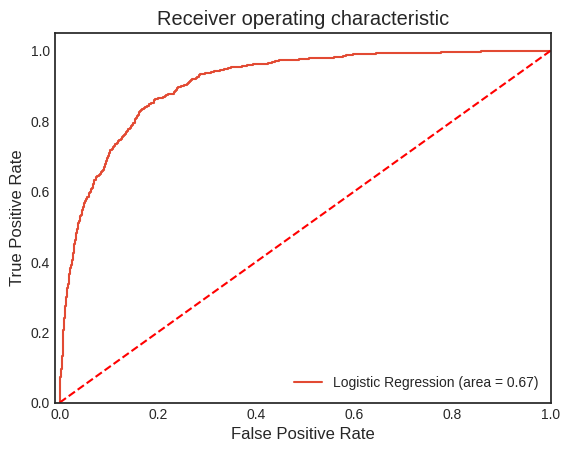

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

From the ROC curve we can infer that our logistic model has classified the prospective leads who made deposit correctly rather than predicting false positive. The more the ROC curve(red) lies towards the top left side the better our model is. We can choose any value between 0.8 to 0.9 for the threshold value which can reap us true positive results

Support vector classifier

In [ ]:
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9171589310829817
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6521
           1       0.00      0.00      0.00       589

    accuracy                           0.92      7110
   macro avg       0.46      0.50      0.48      7110
weighted avg       0.84      0.92      0.88      7110

